In [1]:
import sys
import os
# Append the library path to PYTHONPATH, so library can be imported.
sys.path.append(os.path.dirname(os.getcwd()))
import datetime
import shutil

import numpy as np
import pandas as pd

from library import network as nw

Using TensorFlow backend.


In [2]:
%run setup.py
%load_ext autoreload
%autoreload 2

np.random.seed(RANDOM_SEED)

In [3]:
%run Load_Clean_aux.py

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


We remove samples within one hedging offset before OPTION expiry. 117906 samples ( 3.11%) are removed. We have  96.89% of original data left, which is 3679176.
We remove samples when the next trade is not available. 1732829 samples ( 47.10%) are removed. We have  51.26% of original data left, which is 1946347.
We remove samples when the matching tol is larger than 0.1H. 1049806 samples ( 53.94%) are removed. We have  23.61% of original data left, which is 896541.
We remove NA implvol0. 0 samples ( 0.00%) are removed. We have  23.61% of original data left, which is 896541.
We remove unreasonable implvol0. 4 samples ( 0.00%) are removed. We have  23.61% of original data left, which is 896537.
We remove the first and the last part of day. 233242 samples ( 26.02%) are removed. We have  17.47% of original data left, which is 663295.
We remove samples within one hedging offset before FUTURES expiry. 7987 samples ( 1.20%) are removed. We have  17.26% of original data left, which is 655308.
We

In [4]:
hypers = {
    'nodes_per_layer': (30, 30),
    'reg_alpha': 1e-2,
    'lr': 1e-4,
    'epochs': 200,
    'outact': 'linear'
}

In [5]:
if FEATURE_SET == 'normal_feature':
    ori_fea = ['M0', 'tau0_implvol0']
    sub_res = res_dir + f"Network/Normal_Feature/TuneHypers/"

if FEATURE_SET == 'delta_vega':
    ori_fea = ['delta_bs', '1_over_sqrt_tau', 'vega_n']
    sub_res = res_dir + f"Network/Delta_Vega/TuneHypers/"
    
if VIX:
    ori_fea += ['fake_vix']

use_fea = [x + '_t' for x in ori_fea] + ['cp_int']

if AGG_SIDE_FLAG:
    use_fea += ['AggressorSide']
os.makedirs(sub_res, exist_ok=True)
shutil.copy('setup.py', sub_res)

In [6]:
lab_tune = 'reg_alpha'
value_set = [1e-0, 1e-1, 1e-2, 1e-3]
num_run = NUM_REPEATS
end_period = END_PERIODS

#### Run networks for each value

This is value=1.0 in repeat 0


 Working on period 0.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 8s 26us/step - loss: 7.9443 - mean_squared_error: 0.2628 - val_loss: 0.1613 - val_mean_squared_error: 0.0358
Epoch 2/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.3390 - mean_squared_error: 0.2586 - val_loss: 0.1170 - val_mean_squared_error: 0.0339
Epoch 3/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.3173 - mean_squared_error: 0.2238 - val_loss: 0.1315 - val_mean_squared_error: 0.0291
Epoch 4/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.2977 - mean_squared_error: 0.1947 - val_loss: 0.1324 - val_mean_squared_error: 0.0264
Epoch 5/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.2800 - mea

Epoch 45/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.1130 - mean_squared_error: 0.0371 - val_loss: 0.0818 - val_mean_squared_error: 0.0063
Epoch 46/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1115 - mean_squared_error: 0.0365 - val_loss: 0.0795 - val_mean_squared_error: 0.0056
Epoch 47/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1101 - mean_squared_error: 0.0358 - val_loss: 0.0801 - val_mean_squared_error: 0.0061
Epoch 48/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1087 - mean_squared_error: 0.0352 - val_loss: 0.0780 - val_mean_squared_error: 0.0055
Epoch 49/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.1073 - mean_squared_error: 0.0346 - val_loss: 0.0777 - val_mean_squared_error: 0.0059
Epoch 50/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1059 - mean_squared_error: 0.0342 - val_loss: 0.0769 - val_m

Epoch 93/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0728 - mean_squared_error: 0.0250 - val_loss: 0.0515 - val_mean_squared_error: 0.0042
Epoch 94/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0723 - mean_squared_error: 0.0249 - val_loss: 0.0516 - val_mean_squared_error: 0.0045
Epoch 95/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0719 - mean_squared_error: 0.0249 - val_loss: 0.0506 - val_mean_squared_error: 0.0038
Epoch 96/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0715 - mean_squared_error: 0.0248 - val_loss: 0.0509 - val_mean_squared_error: 0.0044
Epoch 97/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0711 - mean_squared_error: 0.0248 - val_loss: 0.0501 - val_mean_squared_error: 0.0038
Epoch 98/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0706 - mean_squared_error: 0.0246 - val_loss: 0.0508 - val_m

Epoch 188/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0524 - mean_squared_error: 0.0224 - val_loss: 0.0339 - val_mean_squared_error: 0.0041
Epoch 189/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0523 - mean_squared_error: 0.0224 - val_loss: 0.0334 - val_mean_squared_error: 0.0037
Epoch 190/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0523 - mean_squared_error: 0.0224 - val_loss: 0.0337 - val_mean_squared_error: 0.0036
Epoch 191/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0521 - mean_squared_error: 0.0224 - val_loss: 0.0335 - val_mean_squared_error: 0.0039
Epoch 192/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0521 - mean_squared_error: 0.0224 - val_loss: 0.0333 - val_mean_squared_error: 0.0041
Epoch 193/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0519 - mean_squared_error: 0.0224 - val_loss: 0.0340 -

Epoch 83/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0850 - mean_squared_error: 0.0297 - val_loss: 0.0742 - val_mean_squared_error: 0.0194
Epoch 84/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0844 - mean_squared_error: 0.0295 - val_loss: 0.0741 - val_mean_squared_error: 0.0193
Epoch 85/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0839 - mean_squared_error: 0.0291 - val_loss: 0.0726 - val_mean_squared_error: 0.0193
Epoch 86/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0834 - mean_squared_error: 0.0291 - val_loss: 0.0748 - val_mean_squared_error: 0.0209
Epoch 87/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0828 - mean_squared_error: 0.0287 - val_loss: 0.0719 - val_mean_squared_error: 0.0188
Epoch 88/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0823 - mean_squared_error: 0.0286 - val_loss: 0.0741 - val_m

Epoch 131/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0677 - mean_squared_error: 0.0236 - val_loss: 0.0602 - val_mean_squared_error: 0.0161
Epoch 132/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0675 - mean_squared_error: 0.0236 - val_loss: 0.0617 - val_mean_squared_error: 0.0177
Epoch 133/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0673 - mean_squared_error: 0.0236 - val_loss: 0.0597 - val_mean_squared_error: 0.0160
Epoch 134/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0671 - mean_squared_error: 0.0235 - val_loss: 0.0597 - val_mean_squared_error: 0.0160
Epoch 135/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0668 - mean_squared_error: 0.0234 - val_loss: 0.0586 - val_mean_squared_error: 0.0161
Epoch 136/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0667 - mean_squared_error: 0.0234 - val_loss: 0.0591 -

300316/300316 [==============================] - 5s 18us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 26/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 27/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 28/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 29/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 30/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0491 - val_mean_squared_e

Epoch 73/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 74/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 75/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 76/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 77/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 78/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0489 - val_m

Epoch 121/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 122/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 123/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 124/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.3514 - mean_squared_error: 0.3514 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 125/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 126/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.0500 -

232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1791 - val_mean_squared_error: 0.1791
Epoch 16/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 17/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 18/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 19/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 20/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_e

Epoch 63/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 64/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 65/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 66/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 67/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 68/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2595 - mean_squared_error: 0.2595 - val_loss: 0.1787 - val_m

Epoch 111/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 112/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 113/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 114/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 115/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 116/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 -

300316/300316 [==============================] - 6s 19us/step - loss: 0.2857 - mean_squared_error: 0.1794 - val_loss: 0.1346 - val_mean_squared_error: 0.0247
Epoch 6/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.2682 - mean_squared_error: 0.1600 - val_loss: 0.1287 - val_mean_squared_error: 0.0232
Epoch 7/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.2532 - mean_squared_error: 0.1452 - val_loss: 0.1256 - val_mean_squared_error: 0.0220
Epoch 8/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.2403 - mean_squared_error: 0.1335 - val_loss: 0.1243 - val_mean_squared_error: 0.0198
Epoch 9/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.2292 - mean_squared_error: 0.1241 - val_loss: 0.1201 - val_mean_squared_error: 0.0184
Epoch 10/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.2195 - mean_squared_error: 0.1165 - val_loss: 0.1174 - val_mean_squared_error

300316/300316 [==============================] - 6s 21us/step - loss: 0.0974 - mean_squared_error: 0.0311 - val_loss: 0.0710 - val_mean_squared_error: 0.0054
Epoch 54/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0965 - mean_squared_error: 0.0308 - val_loss: 0.0709 - val_mean_squared_error: 0.0054
Epoch 55/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0956 - mean_squared_error: 0.0305 - val_loss: 0.0711 - val_mean_squared_error: 0.0054
Epoch 56/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0947 - mean_squared_error: 0.0302 - val_loss: 0.0683 - val_mean_squared_error: 0.0047
Epoch 57/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0939 - mean_squared_error: 0.0300 - val_loss: 0.0694 - val_mean_squared_error: 0.0051
Epoch 58/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0931 - mean_squared_error: 0.0297 - val_loss: 0.0692 - val_mean_squared_e

Epoch 101/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0722 - mean_squared_error: 0.0249 - val_loss: 0.0515 - val_mean_squared_error: 0.0044
Epoch 102/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0719 - mean_squared_error: 0.0248 - val_loss: 0.0506 - val_mean_squared_error: 0.0039
Epoch 103/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0716 - mean_squared_error: 0.0247 - val_loss: 0.0515 - val_mean_squared_error: 0.0047
Epoch 104/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0713 - mean_squared_error: 0.0247 - val_loss: 0.0513 - val_mean_squared_error: 0.0047
Epoch 105/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0710 - mean_squared_error: 0.0246 - val_loss: 0.0511 - val_mean_squared_error: 0.0048
Epoch 106/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0708 - mean_squared_error: 0.0246 - val_loss: 0.0506 -

Epoch 196/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0563 - mean_squared_error: 0.0227 - val_loss: 0.0376 - val_mean_squared_error: 0.0044
Epoch 197/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0562 - mean_squared_error: 0.0227 - val_loss: 0.0376 - val_mean_squared_error: 0.0040
Epoch 198/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0561 - mean_squared_error: 0.0227 - val_loss: 0.0378 - val_mean_squared_error: 0.0042
Epoch 199/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0560 - mean_squared_error: 0.0227 - val_loss: 0.0368 - val_mean_squared_error: 0.0035
Epoch 200/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0560 - mean_squared_error: 0.0227 - val_loss: 0.0369 - val_mean_squared_error: 0.0039


 Working on period 1.

Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 5s 

Epoch 91/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 92/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 93/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 94/200
232771/232771 [==============================] - 4s 18us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 95/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 96/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_m

Epoch 139/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 140/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 141/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 142/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 143/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 144/200
232771/232771 [==============================] - 4s 18us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 -

300316/300316 [==============================] - 6s 21us/step - loss: 0.1271 - mean_squared_error: 0.0437 - val_loss: 0.0900 - val_mean_squared_error: 0.0072
Epoch 34/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.1252 - mean_squared_error: 0.0426 - val_loss: 0.0887 - val_mean_squared_error: 0.0061
Epoch 35/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.1233 - mean_squared_error: 0.0416 - val_loss: 0.0891 - val_mean_squared_error: 0.0072
Epoch 36/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1216 - mean_squared_error: 0.0406 - val_loss: 0.0882 - val_mean_squared_error: 0.0064
Epoch 37/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.1199 - mean_squared_error: 0.0398 - val_loss: 0.0862 - val_mean_squared_error: 0.0069
Epoch 38/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1183 - mean_squared_error: 0.0390 - val_loss: 0.0842 - val_mean_squared_e

Epoch 81/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0815 - mean_squared_error: 0.0270 - val_loss: 0.0597 - val_mean_squared_error: 0.0052
Epoch 82/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0811 - mean_squared_error: 0.0269 - val_loss: 0.0576 - val_mean_squared_error: 0.0043
Epoch 83/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0806 - mean_squared_error: 0.0268 - val_loss: 0.0588 - val_mean_squared_error: 0.0047
Epoch 84/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0802 - mean_squared_error: 0.0268 - val_loss: 0.0579 - val_mean_squared_error: 0.0042
Epoch 85/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0797 - mean_squared_error: 0.0266 - val_loss: 0.0569 - val_mean_squared_error: 0.0043
Epoch 86/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0793 - mean_squared_error: 0.0266 - val_loss: 0.0576 - val_m

Epoch 129/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0664 - mean_squared_error: 0.0242 - val_loss: 0.0460 - val_mean_squared_error: 0.0041
Epoch 130/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0662 - mean_squared_error: 0.0241 - val_loss: 0.0465 - val_mean_squared_error: 0.0047
Epoch 131/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0659 - mean_squared_error: 0.0241 - val_loss: 0.0465 - val_mean_squared_error: 0.0048
Epoch 132/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0657 - mean_squared_error: 0.0241 - val_loss: 0.0457 - val_mean_squared_error: 0.0043
Epoch 133/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0655 - mean_squared_error: 0.0240 - val_loss: 0.0455 - val_mean_squared_error: 0.0041
Epoch 134/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0653 - mean_squared_error: 0.0240 - val_loss: 0.0466 -

232771/232771 [==============================] - 5s 22us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 24/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 25/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 26/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 27/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 28/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_e

Epoch 71/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 72/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 73/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 74/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 75/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1793 - val_mean_squared_error: 0.1793
Epoch 76/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_m

Epoch 119/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 120/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 121/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 122/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 123/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 124/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1789 -

300316/300316 [==============================] - 6s 19us/step - loss: 0.2120 - mean_squared_error: 0.1104 - val_loss: 0.1197 - val_mean_squared_error: 0.0158
Epoch 14/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.2061 - mean_squared_error: 0.1051 - val_loss: 0.1169 - val_mean_squared_error: 0.0167
Epoch 15/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.2006 - mean_squared_error: 0.1005 - val_loss: 0.1129 - val_mean_squared_error: 0.0148
Epoch 16/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.1956 - mean_squared_error: 0.0964 - val_loss: 0.1118 - val_mean_squared_error: 0.0148
Epoch 17/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1909 - mean_squared_error: 0.0926 - val_loss: 0.1109 - val_mean_squared_error: 0.0140
Epoch 18/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1865 - mean_squared_error: 0.0891 - val_loss: 0.1094 - val_mean_squared_e

Epoch 61/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.1032 - mean_squared_error: 0.0329 - val_loss: 0.0770 - val_mean_squared_error: 0.0071
Epoch 62/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.1022 - mean_squared_error: 0.0327 - val_loss: 0.0776 - val_mean_squared_error: 0.0076
Epoch 63/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.1013 - mean_squared_error: 0.0323 - val_loss: 0.0758 - val_mean_squared_error: 0.0058
Epoch 64/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.1005 - mean_squared_error: 0.0320 - val_loss: 0.0745 - val_mean_squared_error: 0.0059
Epoch 65/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0996 - mean_squared_error: 0.0317 - val_loss: 0.0728 - val_mean_squared_error: 0.0052
Epoch 66/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0988 - mean_squared_error: 0.0315 - val_loss: 0.0732 - val_m

Epoch 109/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0754 - mean_squared_error: 0.0258 - val_loss: 0.0535 - val_mean_squared_error: 0.0041
Epoch 110/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0750 - mean_squared_error: 0.0257 - val_loss: 0.0540 - val_mean_squared_error: 0.0044
Epoch 111/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0747 - mean_squared_error: 0.0256 - val_loss: 0.0528 - val_mean_squared_error: 0.0038
Epoch 112/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0743 - mean_squared_error: 0.0255 - val_loss: 0.0529 - val_mean_squared_error: 0.0045
Epoch 113/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0740 - mean_squared_error: 0.0255 - val_loss: 0.0524 - val_mean_squared_error: 0.0043
Epoch 114/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0737 - mean_squared_error: 0.0255 - val_loss: 0.0528 -

232771/232771 [==============================] - 5s 22us/step - loss: 0.2597 - mean_squared_error: 0.2596 - val_loss: 0.1790 - val_mean_squared_error: 0.1789
Epoch 4/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1787
Epoch 5/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2595 - val_loss: 0.1789 - val_mean_squared_error: 0.1788
Epoch 6/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 7/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 8/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2596 - val_loss: 0.1792 - val_mean_squared_error:

232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 52/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 53/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 54/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 55/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 56/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_mean_squared_e

Epoch 99/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 100/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 101/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 102/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 103/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 104/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - 

Epoch 194/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 195/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 196/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 197/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 198/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 199/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.1791 -

Epoch 89/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0331 - mean_squared_error: 0.0208 - val_loss: 0.0155 - val_mean_squared_error: 0.0033
Epoch 90/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0331 - mean_squared_error: 0.0209 - val_loss: 0.0158 - val_mean_squared_error: 0.0036
Epoch 91/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0330 - mean_squared_error: 0.0209 - val_loss: 0.0156 - val_mean_squared_error: 0.0036
Epoch 92/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0329 - mean_squared_error: 0.0208 - val_loss: 0.0158 - val_mean_squared_error: 0.0038
Epoch 93/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0329 - mean_squared_error: 0.0209 - val_loss: 0.0163 - val_mean_squared_error: 0.0042
Epoch 94/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0329 - mean_squared_error: 0.0209 - val_loss: 0.0163 - val_m

Epoch 137/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0311 - mean_squared_error: 0.0207 - val_loss: 0.0139 - val_mean_squared_error: 0.0035
Epoch 138/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0311 - mean_squared_error: 0.0208 - val_loss: 0.0147 - val_mean_squared_error: 0.0044
Epoch 139/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0311 - mean_squared_error: 0.0208 - val_loss: 0.0140 - val_mean_squared_error: 0.0037
Epoch 140/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0311 - mean_squared_error: 0.0208 - val_loss: 0.0154 - val_mean_squared_error: 0.0053
Epoch 141/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0311 - mean_squared_error: 0.0208 - val_loss: 0.0148 - val_mean_squared_error: 0.0046
Epoch 142/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0310 - mean_squared_error: 0.0208 - val_loss: 0.0141 -

232771/232771 [==============================] - 5s 21us/step - loss: 0.0349 - mean_squared_error: 0.0178 - val_loss: 0.0305 - val_mean_squared_error: 0.0137
Epoch 32/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0346 - mean_squared_error: 0.0177 - val_loss: 0.0316 - val_mean_squared_error: 0.0148
Epoch 33/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0344 - mean_squared_error: 0.0177 - val_loss: 0.0307 - val_mean_squared_error: 0.0141
Epoch 34/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0341 - mean_squared_error: 0.0177 - val_loss: 0.0296 - val_mean_squared_error: 0.0134
Epoch 35/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0338 - mean_squared_error: 0.0177 - val_loss: 0.0312 - val_mean_squared_error: 0.0150
Epoch 36/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0336 - mean_squared_error: 0.0176 - val_loss: 0.0289 - val_mean_squared_e

Epoch 79/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0280 - mean_squared_error: 0.0171 - val_loss: 0.0249 - val_mean_squared_error: 0.0141
Epoch 80/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0280 - mean_squared_error: 0.0172 - val_loss: 0.0252 - val_mean_squared_error: 0.0144
Epoch 81/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0279 - mean_squared_error: 0.0172 - val_loss: 0.0252 - val_mean_squared_error: 0.0145
Epoch 82/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0278 - mean_squared_error: 0.0172 - val_loss: 0.0257 - val_mean_squared_error: 0.0150
Epoch 83/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0277 - mean_squared_error: 0.0171 - val_loss: 0.0249 - val_mean_squared_error: 0.0142
Epoch 84/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0277 - mean_squared_error: 0.0172 - val_loss: 0.0248 - val_m

Epoch 127/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0258 - mean_squared_error: 0.0171 - val_loss: 0.0243 - val_mean_squared_error: 0.0157
Epoch 128/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0257 - mean_squared_error: 0.0171 - val_loss: 0.0234 - val_mean_squared_error: 0.0148
Epoch 129/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0257 - mean_squared_error: 0.0171 - val_loss: 0.0246 - val_mean_squared_error: 0.0159
Epoch 130/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0256 - mean_squared_error: 0.0171 - val_loss: 0.0223 - val_mean_squared_error: 0.0137
Epoch 131/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0256 - mean_squared_error: 0.0171 - val_loss: 0.0261 - val_mean_squared_error: 0.0176
Epoch 132/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0256 - mean_squared_error: 0.0171 - val_loss: 0.0233 -

300316/300316 [==============================] - 5s 18us/step - loss: 0.0408 - mean_squared_error: 0.0213 - val_loss: 0.0225 - val_mean_squared_error: 0.0034
Epoch 22/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0403 - mean_squared_error: 0.0213 - val_loss: 0.0231 - val_mean_squared_error: 0.0044
Epoch 23/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0399 - mean_squared_error: 0.0212 - val_loss: 0.0220 - val_mean_squared_error: 0.0035
Epoch 24/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0394 - mean_squared_error: 0.0212 - val_loss: 0.0222 - val_mean_squared_error: 0.0041
Epoch 25/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0390 - mean_squared_error: 0.0212 - val_loss: 0.0215 - val_mean_squared_error: 0.0039
Epoch 26/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0387 - mean_squared_error: 0.0211 - val_loss: 0.0212 - val_mean_squared_e

Epoch 69/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0316 - mean_squared_error: 0.0208 - val_loss: 0.0144 - val_mean_squared_error: 0.0035
Epoch 70/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0315 - mean_squared_error: 0.0208 - val_loss: 0.0150 - val_mean_squared_error: 0.0043
Epoch 71/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0314 - mean_squared_error: 0.0207 - val_loss: 0.0143 - val_mean_squared_error: 0.0036
Epoch 72/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0314 - mean_squared_error: 0.0207 - val_loss: 0.0144 - val_mean_squared_error: 0.0038
Epoch 73/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0313 - mean_squared_error: 0.0208 - val_loss: 0.0141 - val_mean_squared_error: 0.0035
Epoch 74/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0312 - mean_squared_error: 0.0207 - val_loss: 0.0147 - val_m

Epoch 117/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0291 - mean_squared_error: 0.0207 - val_loss: 0.0118 - val_mean_squared_error: 0.0034
Epoch 118/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0291 - mean_squared_error: 0.0207 - val_loss: 0.0116 - val_mean_squared_error: 0.0032
Epoch 119/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0291 - mean_squared_error: 0.0207 - val_loss: 0.0125 - val_mean_squared_error: 0.0042
Epoch 120/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0291 - mean_squared_error: 0.0207 - val_loss: 0.0118 - val_mean_squared_error: 0.0035
Epoch 121/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0290 - mean_squared_error: 0.0207 - val_loss: 0.0119 - val_mean_squared_error: 0.0035
Epoch 122/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0289 - mean_squared_error: 0.0207 - val_loss: 0.0121 -

232771/232771 [==============================] - 5s 23us/step - loss: 0.0504 - mean_squared_error: 0.0196 - val_loss: 0.0451 - val_mean_squared_error: 0.0148
Epoch 12/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0488 - mean_squared_error: 0.0193 - val_loss: 0.0439 - val_mean_squared_error: 0.0150
Epoch 13/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0475 - mean_squared_error: 0.0191 - val_loss: 0.0421 - val_mean_squared_error: 0.0146
Epoch 14/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0463 - mean_squared_error: 0.0190 - val_loss: 0.0434 - val_mean_squared_error: 0.0164
Epoch 15/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0452 - mean_squared_error: 0.0188 - val_loss: 0.0406 - val_mean_squared_error: 0.0146
Epoch 16/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0444 - mean_squared_error: 0.0187 - val_loss: 0.0395 - val_mean_squared_e

Epoch 59/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0313 - mean_squared_error: 0.0174 - val_loss: 0.0293 - val_mean_squared_error: 0.0154
Epoch 60/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0311 - mean_squared_error: 0.0173 - val_loss: 0.0273 - val_mean_squared_error: 0.0136
Epoch 61/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0310 - mean_squared_error: 0.0173 - val_loss: 0.0292 - val_mean_squared_error: 0.0155
Epoch 62/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0309 - mean_squared_error: 0.0173 - val_loss: 0.0292 - val_mean_squared_error: 0.0156
Epoch 63/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0309 - mean_squared_error: 0.0173 - val_loss: 0.0272 - val_mean_squared_error: 0.0138
Epoch 64/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0307 - mean_squared_error: 0.0173 - val_loss: 0.0270 - val_m

Epoch 107/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0276 - mean_squared_error: 0.0170 - val_loss: 0.0258 - val_mean_squared_error: 0.0153
Epoch 108/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0276 - mean_squared_error: 0.0171 - val_loss: 0.0284 - val_mean_squared_error: 0.0177
Epoch 109/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0276 - mean_squared_error: 0.0171 - val_loss: 0.0273 - val_mean_squared_error: 0.0167
Epoch 110/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0275 - mean_squared_error: 0.0170 - val_loss: 0.0258 - val_mean_squared_error: 0.0153
Epoch 111/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0275 - mean_squared_error: 0.0171 - val_loss: 0.0286 - val_mean_squared_error: 0.0180
Epoch 112/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0275 - mean_squared_error: 0.0171 - val_loss: 0.0244 -

300316/300316 [==============================] - 8s 26us/step - loss: 1.1331 - mean_squared_error: 0.0966 - val_loss: 0.1171 - val_mean_squared_error: 0.0075
Epoch 2/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.1120 - mean_squared_error: 0.0354 - val_loss: 0.0683 - val_mean_squared_error: 0.0049
Epoch 3/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0843 - mean_squared_error: 0.0274 - val_loss: 0.0559 - val_mean_squared_error: 0.0046
Epoch 4/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0727 - mean_squared_error: 0.0250 - val_loss: 0.0495 - val_mean_squared_error: 0.0045
Epoch 5/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0662 - mean_squared_error: 0.0239 - val_loss: 0.0449 - val_mean_squared_error: 0.0047
Epoch 6/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0617 - mean_squared_error: 0.0232 - val_loss: 0.0412 - val_mean_squared_error:

300316/300316 [==============================] - 6s 19us/step - loss: 0.0348 - mean_squared_error: 0.0209 - val_loss: 0.0174 - val_mean_squared_error: 0.0035
Epoch 50/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0348 - mean_squared_error: 0.0209 - val_loss: 0.0177 - val_mean_squared_error: 0.0040
Epoch 51/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0346 - mean_squared_error: 0.0209 - val_loss: 0.0174 - val_mean_squared_error: 0.0037
Epoch 52/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0345 - mean_squared_error: 0.0209 - val_loss: 0.0178 - val_mean_squared_error: 0.0043
Epoch 53/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0343 - mean_squared_error: 0.0209 - val_loss: 0.0172 - val_mean_squared_error: 0.0040
Epoch 54/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0343 - mean_squared_error: 0.0209 - val_loss: 0.0172 - val_mean_squared_e

Epoch 97/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0310 - mean_squared_error: 0.0207 - val_loss: 0.0143 - val_mean_squared_error: 0.0041
Epoch 98/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0309 - mean_squared_error: 0.0207 - val_loss: 0.0143 - val_mean_squared_error: 0.0041
Epoch 99/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0310 - mean_squared_error: 0.0208 - val_loss: 0.0140 - val_mean_squared_error: 0.0039
Epoch 100/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0309 - mean_squared_error: 0.0208 - val_loss: 0.0142 - val_mean_squared_error: 0.0041
Epoch 101/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0308 - mean_squared_error: 0.0208 - val_loss: 0.0137 - val_mean_squared_error: 0.0037
Epoch 102/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0308 - mean_squared_error: 0.0208 - val_loss: 0.0134 - va

Epoch 192/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0282 - mean_squared_error: 0.0207 - val_loss: 0.0109 - val_mean_squared_error: 0.0034
Epoch 193/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0282 - mean_squared_error: 0.0207 - val_loss: 0.0113 - val_mean_squared_error: 0.0037
Epoch 194/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0282 - mean_squared_error: 0.0207 - val_loss: 0.0115 - val_mean_squared_error: 0.0040
Epoch 195/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0282 - mean_squared_error: 0.0207 - val_loss: 0.0111 - val_mean_squared_error: 0.0035
Epoch 196/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0281 - mean_squared_error: 0.0207 - val_loss: 0.0117 - val_mean_squared_error: 0.0042
Epoch 197/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0281 - mean_squared_error: 0.0207 - val_loss: 0.0111 -

Epoch 87/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0290 - mean_squared_error: 0.0172 - val_loss: 0.0253 - val_mean_squared_error: 0.0136
Epoch 88/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0289 - mean_squared_error: 0.0172 - val_loss: 0.0256 - val_mean_squared_error: 0.0139
Epoch 89/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0289 - mean_squared_error: 0.0172 - val_loss: 0.0260 - val_mean_squared_error: 0.0145
Epoch 90/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0288 - mean_squared_error: 0.0172 - val_loss: 0.0257 - val_mean_squared_error: 0.0142
Epoch 91/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0287 - mean_squared_error: 0.0172 - val_loss: 0.0252 - val_mean_squared_error: 0.0138
Epoch 92/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0287 - mean_squared_error: 0.0172 - val_loss: 0.0255 - val_m

Epoch 135/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0266 - mean_squared_error: 0.0171 - val_loss: 0.0265 - val_mean_squared_error: 0.0169
Epoch 136/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0266 - mean_squared_error: 0.0171 - val_loss: 0.0230 - val_mean_squared_error: 0.0136
Epoch 137/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0266 - mean_squared_error: 0.0171 - val_loss: 0.0245 - val_mean_squared_error: 0.0150
Epoch 138/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0266 - mean_squared_error: 0.0171 - val_loss: 0.0235 - val_mean_squared_error: 0.0141
Epoch 139/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0265 - mean_squared_error: 0.0171 - val_loss: 0.0240 - val_mean_squared_error: 0.0146
Epoch 140/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0265 - mean_squared_error: 0.0171 - val_loss: 0.0254 -

300316/300316 [==============================] - 5s 18us/step - loss: 0.0390 - mean_squared_error: 0.0211 - val_loss: 0.0220 - val_mean_squared_error: 0.0042
Epoch 30/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0388 - mean_squared_error: 0.0211 - val_loss: 0.0215 - val_mean_squared_error: 0.0041
Epoch 31/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0384 - mean_squared_error: 0.0211 - val_loss: 0.0215 - val_mean_squared_error: 0.0043
Epoch 32/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0382 - mean_squared_error: 0.0210 - val_loss: 0.0217 - val_mean_squared_error: 0.0048
Epoch 33/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0379 - mean_squared_error: 0.0210 - val_loss: 0.0206 - val_mean_squared_error: 0.0037
Epoch 34/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0377 - mean_squared_error: 0.0210 - val_loss: 0.0202 - val_mean_squared_e

Epoch 77/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0322 - mean_squared_error: 0.0208 - val_loss: 0.0149 - val_mean_squared_error: 0.0037
Epoch 78/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0320 - mean_squared_error: 0.0208 - val_loss: 0.0152 - val_mean_squared_error: 0.0039
Epoch 79/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0320 - mean_squared_error: 0.0208 - val_loss: 0.0146 - val_mean_squared_error: 0.0034
Epoch 80/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0319 - mean_squared_error: 0.0208 - val_loss: 0.0154 - val_mean_squared_error: 0.0044
Epoch 81/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0319 - mean_squared_error: 0.0208 - val_loss: 0.0150 - val_mean_squared_error: 0.0040
Epoch 82/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0318 - mean_squared_error: 0.0208 - val_loss: 0.0149 - val_m

Epoch 125/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0297 - mean_squared_error: 0.0207 - val_loss: 0.0130 - val_mean_squared_error: 0.0039
Epoch 126/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0297 - mean_squared_error: 0.0207 - val_loss: 0.0124 - val_mean_squared_error: 0.0034
Epoch 127/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0297 - mean_squared_error: 0.0207 - val_loss: 0.0136 - val_mean_squared_error: 0.0047
Epoch 128/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0296 - mean_squared_error: 0.0207 - val_loss: 0.0125 - val_mean_squared_error: 0.0035
Epoch 129/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0296 - mean_squared_error: 0.0207 - val_loss: 0.0124 - val_mean_squared_error: 0.0035
Epoch 130/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0296 - mean_squared_error: 0.0208 - val_loss: 0.0135 -

232771/232771 [==============================] - 5s 20us/step - loss: 0.0391 - mean_squared_error: 0.0181 - val_loss: 0.0342 - val_mean_squared_error: 0.0134
Epoch 20/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0385 - mean_squared_error: 0.0181 - val_loss: 0.0352 - val_mean_squared_error: 0.0149
Epoch 21/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0379 - mean_squared_error: 0.0179 - val_loss: 0.0341 - val_mean_squared_error: 0.0145
Epoch 22/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0374 - mean_squared_error: 0.0180 - val_loss: 0.0326 - val_mean_squared_error: 0.0134
Epoch 23/200
232771/232771 [==============================] - 5s 24us/step - loss: 0.0369 - mean_squared_error: 0.0179 - val_loss: 0.0346 - val_mean_squared_error: 0.0157
Epoch 24/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0365 - mean_squared_error: 0.0179 - val_loss: 0.0334 - val_mean_squared_e

Epoch 67/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0282 - mean_squared_error: 0.0171 - val_loss: 0.0253 - val_mean_squared_error: 0.0142
Epoch 68/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0281 - mean_squared_error: 0.0171 - val_loss: 0.0257 - val_mean_squared_error: 0.0147
Epoch 69/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0281 - mean_squared_error: 0.0171 - val_loss: 0.0277 - val_mean_squared_error: 0.0168
Epoch 70/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0280 - mean_squared_error: 0.0171 - val_loss: 0.0246 - val_mean_squared_error: 0.0138
Epoch 71/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0279 - mean_squared_error: 0.0171 - val_loss: 0.0260 - val_mean_squared_error: 0.0153
Epoch 72/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0278 - mean_squared_error: 0.0171 - val_loss: 0.0247 - val_m

Epoch 115/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0255 - mean_squared_error: 0.0170 - val_loss: 0.0223 - val_mean_squared_error: 0.0140
Epoch 116/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0255 - mean_squared_error: 0.0171 - val_loss: 0.0223 - val_mean_squared_error: 0.0140
Epoch 117/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0254 - mean_squared_error: 0.0170 - val_loss: 0.0259 - val_mean_squared_error: 0.0175
Epoch 118/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0254 - mean_squared_error: 0.0170 - val_loss: 0.0230 - val_mean_squared_error: 0.0146
Epoch 119/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0253 - mean_squared_error: 0.0170 - val_loss: 0.0225 - val_mean_squared_error: 0.0142
Epoch 120/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0253 - mean_squared_error: 0.0170 - val_loss: 0.0223 -

300316/300316 [==============================] - 6s 18us/step - loss: 0.0507 - mean_squared_error: 0.0219 - val_loss: 0.0322 - val_mean_squared_error: 0.0042
Epoch 10/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0491 - mean_squared_error: 0.0217 - val_loss: 0.0306 - val_mean_squared_error: 0.0039
Epoch 11/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0477 - mean_squared_error: 0.0216 - val_loss: 0.0300 - val_mean_squared_error: 0.0044
Epoch 12/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0465 - mean_squared_error: 0.0215 - val_loss: 0.0286 - val_mean_squared_error: 0.0041
Epoch 13/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0455 - mean_squared_error: 0.0215 - val_loss: 0.0272 - val_mean_squared_error: 0.0037
Epoch 14/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0446 - mean_squared_error: 0.0214 - val_loss: 0.0267 - val_mean_squared_e

Epoch 57/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0335 - mean_squared_error: 0.0209 - val_loss: 0.0159 - val_mean_squared_error: 0.0033
Epoch 58/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0333 - mean_squared_error: 0.0208 - val_loss: 0.0164 - val_mean_squared_error: 0.0039
Epoch 59/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0332 - mean_squared_error: 0.0208 - val_loss: 0.0159 - val_mean_squared_error: 0.0035
Epoch 60/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0332 - mean_squared_error: 0.0208 - val_loss: 0.0165 - val_mean_squared_error: 0.0042
Epoch 61/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0330 - mean_squared_error: 0.0208 - val_loss: 0.0170 - val_mean_squared_error: 0.0049
Epoch 62/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0330 - mean_squared_error: 0.0208 - val_loss: 0.0161 - val_m

Epoch 105/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0305 - mean_squared_error: 0.0207 - val_loss: 0.0135 - val_mean_squared_error: 0.0038
Epoch 106/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0305 - mean_squared_error: 0.0207 - val_loss: 0.0132 - val_mean_squared_error: 0.0034
Epoch 107/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0304 - mean_squared_error: 0.0207 - val_loss: 0.0136 - val_mean_squared_error: 0.0039
Epoch 108/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0304 - mean_squared_error: 0.0207 - val_loss: 0.0133 - val_mean_squared_error: 0.0035
Epoch 109/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0303 - mean_squared_error: 0.0207 - val_loss: 0.0132 - val_mean_squared_error: 0.0035
Epoch 110/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0303 - mean_squared_error: 0.0207 - val_loss: 0.0130 -

Epoch 200/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0281 - mean_squared_error: 0.0207 - val_loss: 0.0109 - val_mean_squared_error: 0.0034


 Working on period 1.

Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 27us/step - loss: 1.2992 - mean_squared_error: 0.0905 - val_loss: 0.2146 - val_mean_squared_error: 0.0394
Epoch 2/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.1451 - mean_squared_error: 0.0578 - val_loss: 0.0950 - val_mean_squared_error: 0.0311
Epoch 3/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.1031 - mean_squared_error: 0.0419 - val_loss: 0.0826 - val_mean_squared_error: 0.0232
Epoch 4/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0873 - mean_squared_error: 0.0313 - val_loss: 0.0717 - val_mean_squared_error: 0.0191
Epoch 5/200
232771/232771 [==============================] - 5s 21us/ste

Epoch 95/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0277 - mean_squared_error: 0.0172 - val_loss: 0.0245 - val_mean_squared_error: 0.0140
Epoch 96/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0276 - mean_squared_error: 0.0171 - val_loss: 0.0250 - val_mean_squared_error: 0.0146
Epoch 97/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0275 - mean_squared_error: 0.0171 - val_loss: 0.0243 - val_mean_squared_error: 0.0140
Epoch 98/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0275 - mean_squared_error: 0.0171 - val_loss: 0.0244 - val_mean_squared_error: 0.0140
Epoch 99/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0274 - mean_squared_error: 0.0171 - val_loss: 0.0250 - val_mean_squared_error: 0.0148
Epoch 100/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0274 - mean_squared_error: 0.0171 - val_loss: 0.0236 - val_

Epoch 190/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0245 - mean_squared_error: 0.0170 - val_loss: 0.0223 - val_mean_squared_error: 0.0148
Epoch 191/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0245 - mean_squared_error: 0.0170 - val_loss: 0.0220 - val_mean_squared_error: 0.0145
Epoch 192/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0245 - mean_squared_error: 0.0170 - val_loss: 0.0219 - val_mean_squared_error: 0.0145
Epoch 193/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0244 - mean_squared_error: 0.0170 - val_loss: 0.0232 - val_mean_squared_error: 0.0157
Epoch 194/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0244 - mean_squared_error: 0.0169 - val_loss: 0.0227 - val_mean_squared_error: 0.0153
Epoch 195/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0244 - mean_squared_error: 0.0170 - val_loss: 0.0231 -

Epoch 85/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0066 - val_mean_squared_error: 0.0040
Epoch 86/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0065 - val_mean_squared_error: 0.0039
Epoch 87/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0064 - val_mean_squared_error: 0.0037
Epoch 88/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0066 - val_mean_squared_error: 0.0040
Epoch 89/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0066 - val_mean_squared_error: 0.0040
Epoch 90/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0228 - mean_squared_error: 0.0202 - val_loss: 0.0063 - val_m

Epoch 133/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0224 - mean_squared_error: 0.0201 - val_loss: 0.0059 - val_mean_squared_error: 0.0036
Epoch 134/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0224 - mean_squared_error: 0.0201 - val_loss: 0.0064 - val_mean_squared_error: 0.0041
Epoch 135/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0224 - mean_squared_error: 0.0201 - val_loss: 0.0062 - val_mean_squared_error: 0.0039
Epoch 136/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0224 - mean_squared_error: 0.0201 - val_loss: 0.0064 - val_mean_squared_error: 0.0042
Epoch 137/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0223 - mean_squared_error: 0.0201 - val_loss: 0.0060 - val_mean_squared_error: 0.0038
Epoch 138/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0223 - mean_squared_error: 0.0201 - val_loss: 0.0061 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.4413 - mean_squared_error: 0.1462 - val_loss: 0.2261 - val_mean_squared_error: 0.0174
Epoch 2/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.1594 - mean_squared_error: 0.0190 - val_loss: 0.1026 - val_mean_squared_error: 0.0166
Epoch 3/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0754 - mean_squared_error: 0.0177 - val_loss: 0.0529 - val_mean_squared_error: 0.0153
Epoch 4/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0456 - mean_squared_error: 0.0175 - val_loss: 0.0371 - val_mean_squared_error: 0.0160
Epoch 5/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0345 - mean_squared_error: 0.0172 - val_loss: 0.0291 - val_mean_squared_error: 0.0146
Epoch 6/200
232771/232771 [==============================] - 5s 24us/step - loss: 0.0297 - mean_squ

Epoch 96/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0187 - mean_squared_error: 0.0158 - val_loss: 0.0186 - val_mean_squared_error: 0.0156
Epoch 97/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0187 - mean_squared_error: 0.0158 - val_loss: 0.0170 - val_mean_squared_error: 0.0141
Epoch 98/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0187 - mean_squared_error: 0.0157 - val_loss: 0.0183 - val_mean_squared_error: 0.0153
Epoch 99/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0187 - mean_squared_error: 0.0158 - val_loss: 0.0189 - val_mean_squared_error: 0.0160
Epoch 100/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0187 - mean_squared_error: 0.0158 - val_loss: 0.0170 - val_mean_squared_error: 0.0141
Epoch 101/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0187 - mean_squared_error: 0.0158 - val_loss: 0.0179 - val

Epoch 191/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0178 - mean_squared_error: 0.0156 - val_loss: 0.0172 - val_mean_squared_error: 0.0149
Epoch 192/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0178 - mean_squared_error: 0.0156 - val_loss: 0.0180 - val_mean_squared_error: 0.0157
Epoch 193/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0178 - mean_squared_error: 0.0155 - val_loss: 0.0170 - val_mean_squared_error: 0.0147
Epoch 194/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0178 - mean_squared_error: 0.0155 - val_loss: 0.0162 - val_mean_squared_error: 0.0140
Epoch 195/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0178 - mean_squared_error: 0.0156 - val_loss: 0.0177 - val_mean_squared_error: 0.0155
Epoch 196/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0178 - mean_squared_error: 0.0156 - val_loss: 0.0171 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.01 in repeat 1


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.2646 - mean_squared_error: 0.0414 - val_loss: 0.1137 - val_mean_squared_error: 0.0044
Epoch 2/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0845 - mean_squared_error: 0.0213 - val_loss: 0.0385 - val_mean_squared_error: 0.0039
Epoch 3/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0443 - mean_squared_error: 0.0206 - val_loss: 0.0207 - val_mean_squared_error: 0.0037
Epoch 4/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0348 - mean_squared_error: 0.0205 - val_loss: 0.0162 - val_mean_squared_error: 0.0040
Epoch 5/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0317 - mean_squared_error: 0.0205 - val_loss: 0.0144 - val_mean_squared_error: 0.0041
Epoch 6/200
300316/300316 [================

Epoch 96/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0068 - val_mean_squared_error: 0.0041
Epoch 97/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0061 - val_mean_squared_error: 0.0034
Epoch 98/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0067 - val_mean_squared_error: 0.0040
Epoch 99/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0065 - val_mean_squared_error: 0.0038
Epoch 100/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0064 - val_mean_squared_error: 0.0038
Epoch 101/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0062 - val

Epoch 191/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0220 - mean_squared_error: 0.0199 - val_loss: 0.0056 - val_mean_squared_error: 0.0034
Epoch 192/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0221 - mean_squared_error: 0.0199 - val_loss: 0.0059 - val_mean_squared_error: 0.0037
Epoch 193/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0220 - mean_squared_error: 0.0199 - val_loss: 0.0060 - val_mean_squared_error: 0.0039
Epoch 194/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0221 - mean_squared_error: 0.0199 - val_loss: 0.0059 - val_mean_squared_error: 0.0038
Epoch 195/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0220 - mean_squared_error: 0.0199 - val_loss: 0.0057 - val_mean_squared_error: 0.0035
Epoch 196/200
300316/300316 [==============================] - 5s 18us/step - loss: 0.0220 - mean_squared_error: 0.0198 - val_loss: 0.0060 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.2834 - mean_squared_error: 0.0535 - val_loss: 0.1444 - val_mean_squared_error: 0.0158
Epoch 2/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0981 - mean_squared_error: 0.0174 - val_loss: 0.0630 - val_mean_squared_error: 0.0145
Epoch 3/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0511 - mean_squared_error: 0.0172 - val_loss: 0.0379 - val_mean_squared_error: 0.0143
Epoch 4/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0359 - mean_squared_error: 0.0172 - val_loss: 0.0293 - val_mean_squared_error: 0.0143
Epoch 5/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0301 - mean_squared_error: 0.0170 - val_loss: 0.0263 - val_mean_squared_error: 0.0147
Epoch 6/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0276 - mean_sq

Epoch 96/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0193 - mean_squared_error: 0.0165 - val_loss: 0.0187 - val_mean_squared_error: 0.0158
Epoch 97/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0192 - mean_squared_error: 0.0164 - val_loss: 0.0193 - val_mean_squared_error: 0.0165
Epoch 98/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0192 - mean_squared_error: 0.0164 - val_loss: 0.0190 - val_mean_squared_error: 0.0162
Epoch 99/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0192 - mean_squared_error: 0.0164 - val_loss: 0.0186 - val_mean_squared_error: 0.0158
Epoch 100/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0192 - mean_squared_error: 0.0165 - val_loss: 0.0207 - val_mean_squared_error: 0.0179
Epoch 101/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0192 - mean_squared_error: 0.0165 - val_loss: 0.0179 - val

Epoch 191/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0185 - mean_squared_error: 0.0164 - val_loss: 0.0174 - val_mean_squared_error: 0.0153
Epoch 192/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0185 - mean_squared_error: 0.0165 - val_loss: 0.0184 - val_mean_squared_error: 0.0164
Epoch 193/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0185 - mean_squared_error: 0.0164 - val_loss: 0.0182 - val_mean_squared_error: 0.0161
Epoch 194/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0185 - mean_squared_error: 0.0164 - val_loss: 0.0176 - val_mean_squared_error: 0.0155
Epoch 195/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0185 - mean_squared_error: 0.0165 - val_loss: 0.0164 - val_mean_squared_error: 0.0143
Epoch 196/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0185 - mean_squared_error: 0.0164 - val_loss: 0.0173 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.01 in repeat 2


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 8s 26us/step - loss: 0.3002 - mean_squared_error: 0.0604 - val_loss: 0.1344 - val_mean_squared_error: 0.0048
Epoch 2/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.0976 - mean_squared_error: 0.0215 - val_loss: 0.0464 - val_mean_squared_error: 0.0039
Epoch 3/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0496 - mean_squared_error: 0.0209 - val_loss: 0.0235 - val_mean_squared_error: 0.0039
Epoch 4/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0360 - mean_squared_error: 0.0206 - val_loss: 0.0162 - val_mean_squared_error: 0.0037
Epoch 5/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0315 - mean_squared_error: 0.0204 - val_loss: 0.0137 - val_mean_squared_error: 0.0036
Epoch 6/200
300316/300316 [================

Epoch 96/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0230 - mean_squared_error: 0.0202 - val_loss: 0.0063 - val_mean_squared_error: 0.0035
Epoch 97/200
300316/300316 [==============================] - 6s 18us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0072 - val_mean_squared_error: 0.0044
Epoch 98/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0065 - val_mean_squared_error: 0.0038
Epoch 99/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0230 - mean_squared_error: 0.0202 - val_loss: 0.0067 - val_mean_squared_error: 0.0039
Epoch 100/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0066 - val_mean_squared_error: 0.0038
Epoch 101/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0069 - val

Epoch 191/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0058 - val_mean_squared_error: 0.0037
Epoch 192/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0064 - val_mean_squared_error: 0.0043
Epoch 193/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0064 - val_mean_squared_error: 0.0043
Epoch 194/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0064 - val_mean_squared_error: 0.0043
Epoch 195/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0062 - val_mean_squared_error: 0.0041
Epoch 196/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0062 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.3150 - mean_squared_error: 0.0689 - val_loss: 0.1680 - val_mean_squared_error: 0.0158
Epoch 2/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.1184 - mean_squared_error: 0.0187 - val_loss: 0.0777 - val_mean_squared_error: 0.0152
Epoch 3/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0627 - mean_squared_error: 0.0176 - val_loss: 0.0486 - val_mean_squared_error: 0.0158
Epoch 4/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0432 - mean_squared_error: 0.0172 - val_loss: 0.0355 - val_mean_squared_error: 0.0149
Epoch 5/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0344 - mean_squared_error: 0.0170 - val_loss: 0.0302 - val_mean_squared_error: 0.0153
Epoch 6/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0301 - mean_sq

Epoch 96/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0192 - mean_squared_error: 0.0162 - val_loss: 0.0176 - val_mean_squared_error: 0.0147
Epoch 97/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0192 - mean_squared_error: 0.0162 - val_loss: 0.0193 - val_mean_squared_error: 0.0164
Epoch 98/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0191 - mean_squared_error: 0.0162 - val_loss: 0.0177 - val_mean_squared_error: 0.0147
Epoch 99/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0191 - mean_squared_error: 0.0162 - val_loss: 0.0179 - val_mean_squared_error: 0.0149
Epoch 100/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0191 - mean_squared_error: 0.0162 - val_loss: 0.0177 - val_mean_squared_error: 0.0148
Epoch 101/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0192 - mean_squared_error: 0.0162 - val_loss: 0.0182 - val

Epoch 191/200
232771/232771 [==============================] - 4s 19us/step - loss: 0.0182 - mean_squared_error: 0.0157 - val_loss: 0.0184 - val_mean_squared_error: 0.0159
Epoch 192/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0182 - mean_squared_error: 0.0157 - val_loss: 0.0170 - val_mean_squared_error: 0.0145
Epoch 193/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0182 - mean_squared_error: 0.0158 - val_loss: 0.0173 - val_mean_squared_error: 0.0149
Epoch 194/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0182 - mean_squared_error: 0.0157 - val_loss: 0.0168 - val_mean_squared_error: 0.0144
Epoch 195/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0182 - mean_squared_error: 0.0157 - val_loss: 0.0166 - val_mean_squared_error: 0.0142
Epoch 196/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0182 - mean_squared_error: 0.0157 - val_loss: 0.0172 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.01 in repeat 3


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.2946 - mean_squared_error: 0.0712 - val_loss: 0.1198 - val_mean_squared_error: 0.0043
Epoch 2/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0901 - mean_squared_error: 0.0214 - val_loss: 0.0437 - val_mean_squared_error: 0.0041
Epoch 3/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0487 - mean_squared_error: 0.0210 - val_loss: 0.0237 - val_mean_squared_error: 0.0040
Epoch 4/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0365 - mean_squared_error: 0.0207 - val_loss: 0.0170 - val_mean_squared_error: 0.0041
Epoch 5/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0320 - mean_squared_error: 0.0205 - val_loss: 0.0145 - val_mean_squared_error: 0.0041
Epoch 6/200
300316/300316 [================

Epoch 96/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0230 - mean_squared_error: 0.0202 - val_loss: 0.0064 - val_mean_squared_error: 0.0036
Epoch 97/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0230 - mean_squared_error: 0.0202 - val_loss: 0.0064 - val_mean_squared_error: 0.0036
Epoch 98/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0230 - mean_squared_error: 0.0202 - val_loss: 0.0069 - val_mean_squared_error: 0.0042
Epoch 99/200
300316/300316 [==============================] - 6s 22us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0067 - val_mean_squared_error: 0.0040
Epoch 100/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0230 - mean_squared_error: 0.0202 - val_loss: 0.0070 - val_mean_squared_error: 0.0042
Epoch 101/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0066 - val

Epoch 191/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0058 - val_mean_squared_error: 0.0036
Epoch 192/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0060 - val_mean_squared_error: 0.0039
Epoch 193/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0058 - val_mean_squared_error: 0.0036
Epoch 194/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0058 - val_mean_squared_error: 0.0037
Epoch 195/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0223 - mean_squared_error: 0.0202 - val_loss: 0.0059 - val_mean_squared_error: 0.0038
Epoch 196/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.0223 - mean_squared_error: 0.0201 - val_loss: 0.0060 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.3557 - mean_squared_error: 0.0972 - val_loss: 0.1761 - val_mean_squared_error: 0.0152
Epoch 2/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.1165 - mean_squared_error: 0.0170 - val_loss: 0.0704 - val_mean_squared_error: 0.0151
Epoch 3/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0531 - mean_squared_error: 0.0170 - val_loss: 0.0397 - val_mean_squared_error: 0.0159
Epoch 4/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0354 - mean_squared_error: 0.0169 - val_loss: 0.0313 - val_mean_squared_error: 0.0165
Epoch 5/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0298 - mean_squared_error: 0.0169 - val_loss: 0.0269 - val_mean_squared_error: 0.0154
Epoch 6/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0274 - mean_sq

Epoch 96/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0193 - mean_squared_error: 0.0162 - val_loss: 0.0182 - val_mean_squared_error: 0.0152
Epoch 97/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0192 - mean_squared_error: 0.0162 - val_loss: 0.0179 - val_mean_squared_error: 0.0148
Epoch 98/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0193 - mean_squared_error: 0.0162 - val_loss: 0.0176 - val_mean_squared_error: 0.0145
Epoch 99/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0193 - mean_squared_error: 0.0162 - val_loss: 0.0182 - val_mean_squared_error: 0.0151
Epoch 100/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0192 - mean_squared_error: 0.0161 - val_loss: 0.0182 - val_mean_squared_error: 0.0151
Epoch 101/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0192 - mean_squared_error: 0.0162 - val_loss: 0.0180 - val

Epoch 191/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0185 - mean_squared_error: 0.0162 - val_loss: 0.0171 - val_mean_squared_error: 0.0148
Epoch 192/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0185 - mean_squared_error: 0.0162 - val_loss: 0.0171 - val_mean_squared_error: 0.0148
Epoch 193/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0185 - mean_squared_error: 0.0162 - val_loss: 0.0174 - val_mean_squared_error: 0.0151
Epoch 194/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0185 - mean_squared_error: 0.0162 - val_loss: 0.0181 - val_mean_squared_error: 0.0158
Epoch 195/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0185 - mean_squared_error: 0.0162 - val_loss: 0.0170 - val_mean_squared_error: 0.0147
Epoch 196/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0184 - mean_squared_error: 0.0162 - val_loss: 0.0159 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.01 in repeat 4


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.2928 - mean_squared_error: 0.0996 - val_loss: 0.0920 - val_mean_squared_error: 0.0047
Epoch 2/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.0704 - mean_squared_error: 0.0215 - val_loss: 0.0314 - val_mean_squared_error: 0.0040
Epoch 3/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0407 - mean_squared_error: 0.0207 - val_loss: 0.0194 - val_mean_squared_error: 0.0045
Epoch 4/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0333 - mean_squared_error: 0.0205 - val_loss: 0.0154 - val_mean_squared_error: 0.0041
Epoch 5/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0308 - mean_squared_error: 0.0205 - val_loss: 0.0136 - val_mean_squared_error: 0.0041
Epoch 6/200
300316/300316 [================

Epoch 96/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0068 - val_mean_squared_error: 0.0041
Epoch 97/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0229 - mean_squared_error: 0.0201 - val_loss: 0.0063 - val_mean_squared_error: 0.0036
Epoch 98/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0063 - val_mean_squared_error: 0.0036
Epoch 99/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0229 - mean_squared_error: 0.0202 - val_loss: 0.0063 - val_mean_squared_error: 0.0036
Epoch 100/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0067 - val_mean_squared_error: 0.0040
Epoch 101/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0228 - mean_squared_error: 0.0201 - val_loss: 0.0062 - val

Epoch 191/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0222 - mean_squared_error: 0.0202 - val_loss: 0.0057 - val_mean_squared_error: 0.0037
Epoch 192/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0222 - mean_squared_error: 0.0201 - val_loss: 0.0058 - val_mean_squared_error: 0.0038
Epoch 193/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0221 - mean_squared_error: 0.0201 - val_loss: 0.0062 - val_mean_squared_error: 0.0041
Epoch 194/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0222 - mean_squared_error: 0.0202 - val_loss: 0.0057 - val_mean_squared_error: 0.0037
Epoch 195/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0222 - mean_squared_error: 0.0202 - val_loss: 0.0059 - val_mean_squared_error: 0.0039
Epoch 196/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0222 - mean_squared_error: 0.0202 - val_loss: 0.0058 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.3095 - mean_squared_error: 0.0613 - val_loss: 0.1640 - val_mean_squared_error: 0.0162
Epoch 2/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.1107 - mean_squared_error: 0.0182 - val_loss: 0.0690 - val_mean_squared_error: 0.0152
Epoch 3/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0536 - mean_squared_error: 0.0177 - val_loss: 0.0394 - val_mean_squared_error: 0.0154
Epoch 4/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0358 - mean_squared_error: 0.0172 - val_loss: 0.0308 - val_mean_squared_error: 0.0158
Epoch 5/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0300 - mean_squared_error: 0.0169 - val_loss: 0.0282 - val_mean_squared_error: 0.0163
Epoch 6/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0277 - mean_sq

Epoch 96/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0189 - mean_squared_error: 0.0158 - val_loss: 0.0181 - val_mean_squared_error: 0.0150
Epoch 97/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0189 - mean_squared_error: 0.0158 - val_loss: 0.0172 - val_mean_squared_error: 0.0141
Epoch 98/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0189 - mean_squared_error: 0.0159 - val_loss: 0.0168 - val_mean_squared_error: 0.0138
Epoch 99/200
232771/232771 [==============================] - 5s 19us/step - loss: 0.0189 - mean_squared_error: 0.0158 - val_loss: 0.0181 - val_mean_squared_error: 0.0151
Epoch 100/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0188 - mean_squared_error: 0.0158 - val_loss: 0.0168 - val_mean_squared_error: 0.0138
Epoch 101/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0189 - mean_squared_error: 0.0159 - val_loss: 0.0179 - val

Epoch 191/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0180 - mean_squared_error: 0.0156 - val_loss: 0.0182 - val_mean_squared_error: 0.0158
Epoch 192/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0181 - mean_squared_error: 0.0156 - val_loss: 0.0171 - val_mean_squared_error: 0.0146
Epoch 193/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0180 - mean_squared_error: 0.0156 - val_loss: 0.0182 - val_mean_squared_error: 0.0157
Epoch 194/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0180 - mean_squared_error: 0.0156 - val_loss: 0.0171 - val_mean_squared_error: 0.0147
Epoch 195/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0180 - mean_squared_error: 0.0156 - val_loss: 0.0168 - val_mean_squared_error: 0.0144
Epoch 196/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0180 - mean_squared_error: 0.0156 - val_loss: 0.0173 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)




 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.1126 - mean_squared_error: 0.0785 - val_loss: 0.0346 - val_mean_squared_error: 0.0041
Epoch 2/200
300316/300316 [==============================] - 8s 26us/step - loss: 0.0465 - mean_squared_error: 0.0197 - val_loss: 0.0270 - val_mean_squared_error: 0.0035
Epoch 3/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0403 - mean_squared_error: 0.0192 - val_loss: 0.0235 - val_mean_squared_error: 0.0045
Epoch 4/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0363 - mean_squared_error: 0.0190 - val_loss: 0.0195 - val_mean_squared_error: 0.0036
Epoch 5/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0336 - mean_squared_error: 0.0189 - val_loss: 0.0176 - val_mean_squared_error: 0.0041
Epoch 6/200
300316/300316 [==============================] - 6s 20us/step 

Epoch 96/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0194 - mean_squared_error: 0.0178 - val_loss: 0.0054 - val_mean_squared_error: 0.0038
Epoch 97/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0194 - mean_squared_error: 0.0178 - val_loss: 0.0052 - val_mean_squared_error: 0.0036
Epoch 98/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0194 - mean_squared_error: 0.0178 - val_loss: 0.0060 - val_mean_squared_error: 0.0044
Epoch 99/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0194 - mean_squared_error: 0.0178 - val_loss: 0.0052 - val_mean_squared_error: 0.0036
Epoch 100/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0194 - mean_squared_error: 0.0178 - val_loss: 0.0053 - val_mean_squared_error: 0.0037
Epoch 101/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0194 - mean_squared_error: 0.0178 - val_loss: 0.0055 - val

Epoch 191/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0187 - mean_squared_error: 0.0173 - val_loss: 0.0054 - val_mean_squared_error: 0.0041
Epoch 192/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0050 - val_mean_squared_error: 0.0036
Epoch 193/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0059 - val_mean_squared_error: 0.0046
Epoch 194/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0051 - val_mean_squared_error: 0.0037
Epoch 195/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0053 - val_mean_squared_error: 0.0040
Epoch 196/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0050 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.1170 - mean_squared_error: 0.0853 - val_loss: 0.0440 - val_mean_squared_error: 0.0165
Epoch 2/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0403 - mean_squared_error: 0.0160 - val_loss: 0.0374 - val_mean_squared_error: 0.0159
Epoch 3/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0346 - mean_squared_error: 0.0150 - val_loss: 0.0344 - val_mean_squared_error: 0.0165
Epoch 4/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0313 - mean_squared_error: 0.0147 - val_loss: 0.0317 - val_mean_squared_error: 0.0162
Epoch 5/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0290 - mean_squared_error: 0.0145 - val_loss: 0.0292 - val_mean_squared_error: 0.0156
Epoch 6/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0272 - mean_sq

Epoch 96/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0144 - mean_squared_error: 0.0124 - val_loss: 0.0194 - val_mean_squared_error: 0.0174
Epoch 97/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0176 - val_mean_squared_error: 0.0157
Epoch 98/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0198 - val_mean_squared_error: 0.0178
Epoch 99/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0201 - val_mean_squared_error: 0.0182
Epoch 100/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0197 - val_mean_squared_error: 0.0178
Epoch 101/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0143 - mean_squared_error: 0.0123 - val_loss: 0.0188 - val

Epoch 191/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0135 - mean_squared_error: 0.0119 - val_loss: 0.0172 - val_mean_squared_error: 0.0156
Epoch 192/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0135 - mean_squared_error: 0.0119 - val_loss: 0.0196 - val_mean_squared_error: 0.0181
Epoch 193/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0134 - mean_squared_error: 0.0119 - val_loss: 0.0187 - val_mean_squared_error: 0.0172
Epoch 194/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0135 - mean_squared_error: 0.0119 - val_loss: 0.0208 - val_mean_squared_error: 0.0193
Epoch 195/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0134 - mean_squared_error: 0.0119 - val_loss: 0.0191 - val_mean_squared_error: 0.0176
Epoch 196/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0134 - mean_squared_error: 0.0119 - val_loss: 0.0179 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.001 in repeat 1


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 8s 25us/step - loss: 0.0762 - mean_squared_error: 0.0460 - val_loss: 0.0299 - val_mean_squared_error: 0.0039
Epoch 2/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.0427 - mean_squared_error: 0.0198 - val_loss: 0.0242 - val_mean_squared_error: 0.0040
Epoch 3/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0375 - mean_squared_error: 0.0192 - val_loss: 0.0203 - val_mean_squared_error: 0.0038
Epoch 4/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.0342 - mean_squared_error: 0.0191 - val_loss: 0.0179 - val_mean_squared_error: 0.0040
Epoch 5/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0319 - mean_squared_error: 0.0190 - val_loss: 0.0161 - val_mean_squared_error: 0.0042
Epoch 6/200
300316/300316 [===============

Epoch 96/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0195 - mean_squared_error: 0.0179 - val_loss: 0.0055 - val_mean_squared_error: 0.0039
Epoch 97/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0195 - mean_squared_error: 0.0179 - val_loss: 0.0055 - val_mean_squared_error: 0.0039
Epoch 98/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0195 - mean_squared_error: 0.0179 - val_loss: 0.0053 - val_mean_squared_error: 0.0038
Epoch 99/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.0195 - mean_squared_error: 0.0179 - val_loss: 0.0056 - val_mean_squared_error: 0.0040
Epoch 100/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0195 - mean_squared_error: 0.0179 - val_loss: 0.0055 - val_mean_squared_error: 0.0039
Epoch 101/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0195 - mean_squared_error: 0.0179 - val_loss: 0.0054 - val

Epoch 191/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0189 - mean_squared_error: 0.0175 - val_loss: 0.0055 - val_mean_squared_error: 0.0041
Epoch 192/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0189 - mean_squared_error: 0.0175 - val_loss: 0.0051 - val_mean_squared_error: 0.0038
Epoch 193/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0189 - mean_squared_error: 0.0175 - val_loss: 0.0053 - val_mean_squared_error: 0.0039
Epoch 194/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0189 - mean_squared_error: 0.0175 - val_loss: 0.0054 - val_mean_squared_error: 0.0040
Epoch 195/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0189 - mean_squared_error: 0.0175 - val_loss: 0.0054 - val_mean_squared_error: 0.0041
Epoch 196/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0189 - mean_squared_error: 0.0175 - val_loss: 0.0052 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.1014 - mean_squared_error: 0.0681 - val_loss: 0.0488 - val_mean_squared_error: 0.0188
Epoch 2/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0432 - mean_squared_error: 0.0164 - val_loss: 0.0415 - val_mean_squared_error: 0.0177
Epoch 3/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0368 - mean_squared_error: 0.0154 - val_loss: 0.0359 - val_mean_squared_error: 0.0168
Epoch 4/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0325 - mean_squared_error: 0.0151 - val_loss: 0.0317 - val_mean_squared_error: 0.0158
Epoch 5/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0296 - mean_squared_error: 0.0149 - val_loss: 0.0298 - val_mean_squared_error: 0.0163
Epoch 6/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0274 - mean_squ

Epoch 96/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0144 - mean_squared_error: 0.0125 - val_loss: 0.0213 - val_mean_squared_error: 0.0193
Epoch 97/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0144 - mean_squared_error: 0.0125 - val_loss: 0.0202 - val_mean_squared_error: 0.0182
Epoch 98/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0144 - mean_squared_error: 0.0125 - val_loss: 0.0188 - val_mean_squared_error: 0.0169
Epoch 99/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0144 - mean_squared_error: 0.0124 - val_loss: 0.0177 - val_mean_squared_error: 0.0157
Epoch 100/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0144 - mean_squared_error: 0.0124 - val_loss: 0.0189 - val_mean_squared_error: 0.0170
Epoch 101/200
232771/232771 [==============================] - 6s 28us/step - loss: 0.0144 - mean_squared_error: 0.0124 - val_loss: 0.0210 - val

Epoch 191/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0136 - mean_squared_error: 0.0121 - val_loss: 0.0197 - val_mean_squared_error: 0.0182
Epoch 192/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0136 - mean_squared_error: 0.0121 - val_loss: 0.0198 - val_mean_squared_error: 0.0182
Epoch 193/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0136 - mean_squared_error: 0.0121 - val_loss: 0.0188 - val_mean_squared_error: 0.0173
Epoch 194/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0136 - mean_squared_error: 0.0121 - val_loss: 0.0191 - val_mean_squared_error: 0.0175
Epoch 195/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0136 - mean_squared_error: 0.0121 - val_loss: 0.0183 - val_mean_squared_error: 0.0168
Epoch 196/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0136 - mean_squared_error: 0.0121 - val_loss: 0.0201 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.001 in repeat 2


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 12s 40us/step - loss: 0.1095 - mean_squared_error: 0.0762 - val_loss: 0.0340 - val_mean_squared_error: 0.0043
Epoch 2/200
300316/300316 [==============================] - 10s 35us/step - loss: 0.0459 - mean_squared_error: 0.0198 - val_loss: 0.0269 - val_mean_squared_error: 0.0041
Epoch 3/200
300316/300316 [==============================] - 10s 33us/step - loss: 0.0398 - mean_squared_error: 0.0194 - val_loss: 0.0228 - val_mean_squared_error: 0.0044
Epoch 4/200
300316/300316 [==============================] - 10s 34us/step - loss: 0.0359 - mean_squared_error: 0.0192 - val_loss: 0.0190 - val_mean_squared_error: 0.0038
Epoch 5/200
300316/300316 [==============================] - 10s 33us/step - loss: 0.0331 - mean_squared_error: 0.0191 - val_loss: 0.0166 - val_mean_squared_error: 0.0037
Epoch 6/200
300316/300316 [==========

Epoch 96/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0196 - mean_squared_error: 0.0183 - val_loss: 0.0055 - val_mean_squared_error: 0.0042
Epoch 97/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0196 - mean_squared_error: 0.0183 - val_loss: 0.0053 - val_mean_squared_error: 0.0039
Epoch 98/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0196 - mean_squared_error: 0.0183 - val_loss: 0.0054 - val_mean_squared_error: 0.0040
Epoch 99/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.0196 - mean_squared_error: 0.0183 - val_loss: 0.0053 - val_mean_squared_error: 0.0040
Epoch 100/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0196 - mean_squared_error: 0.0183 - val_loss: 0.0052 - val_mean_squared_error: 0.0039
Epoch 101/200
300316/300316 [==============================] - 9s 29us/step - loss: 0.0196 - mean_squared_error: 0.0183 - val_loss: 0.0051 - val

Epoch 191/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0190 - mean_squared_error: 0.0179 - val_loss: 0.0055 - val_mean_squared_error: 0.0043
Epoch 192/200
300316/300316 [==============================] - 8s 26us/step - loss: 0.0190 - mean_squared_error: 0.0178 - val_loss: 0.0055 - val_mean_squared_error: 0.0043
Epoch 193/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.0190 - mean_squared_error: 0.0178 - val_loss: 0.0051 - val_mean_squared_error: 0.0039
Epoch 194/200
300316/300316 [==============================] - 8s 26us/step - loss: 0.0190 - mean_squared_error: 0.0178 - val_loss: 0.0051 - val_mean_squared_error: 0.0039
Epoch 195/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0190 - mean_squared_error: 0.0178 - val_loss: 0.0047 - val_mean_squared_error: 0.0035
Epoch 196/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0190 - mean_squared_error: 0.0178 - val_loss: 0.0050 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)




 Working on period 1.

Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 8s 35us/step - loss: 0.1027 - mean_squared_error: 0.0706 - val_loss: 0.0451 - val_mean_squared_error: 0.0169
Epoch 2/200
232771/232771 [==============================] - 7s 29us/step - loss: 0.0416 - mean_squared_error: 0.0163 - val_loss: 0.0378 - val_mean_squared_error: 0.0154
Epoch 3/200
232771/232771 [==============================] - 7s 30us/step - loss: 0.0351 - mean_squared_error: 0.0151 - val_loss: 0.0336 - val_mean_squared_error: 0.0156
Epoch 4/200
232771/232771 [==============================] - 7s 31us/step - loss: 0.0313 - mean_squared_error: 0.0148 - val_loss: 0.0310 - val_mean_squared_error: 0.0158
Epoch 5/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0287 - mean_squared_error: 0.0146 - val_loss: 0.0296 - val_mean_squared_error: 0.0165
Epoch 6/200
232771/232771 [==============================] - 7s 30us/step 

Epoch 96/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0142 - mean_squared_error: 0.0124 - val_loss: 0.0191 - val_mean_squared_error: 0.0173
Epoch 97/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0141 - mean_squared_error: 0.0123 - val_loss: 0.0202 - val_mean_squared_error: 0.0184
Epoch 98/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0141 - mean_squared_error: 0.0123 - val_loss: 0.0192 - val_mean_squared_error: 0.0174
Epoch 99/200
232771/232771 [==============================] - 6s 28us/step - loss: 0.0141 - mean_squared_error: 0.0123 - val_loss: 0.0198 - val_mean_squared_error: 0.0180
Epoch 100/200
232771/232771 [==============================] - 7s 29us/step - loss: 0.0141 - mean_squared_error: 0.0123 - val_loss: 0.0194 - val_mean_squared_error: 0.0176
Epoch 101/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0141 - mean_squared_error: 0.0124 - val_loss: 0.0197 - val

Epoch 191/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0134 - mean_squared_error: 0.0120 - val_loss: 0.0179 - val_mean_squared_error: 0.0165
Epoch 192/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0133 - mean_squared_error: 0.0119 - val_loss: 0.0198 - val_mean_squared_error: 0.0184
Epoch 193/200
232771/232771 [==============================] - 7s 29us/step - loss: 0.0133 - mean_squared_error: 0.0119 - val_loss: 0.0192 - val_mean_squared_error: 0.0179
Epoch 194/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0133 - mean_squared_error: 0.0120 - val_loss: 0.0190 - val_mean_squared_error: 0.0176
Epoch 195/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0133 - mean_squared_error: 0.0119 - val_loss: 0.0185 - val_mean_squared_error: 0.0171
Epoch 196/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0133 - mean_squared_error: 0.0120 - val_loss: 0.0189 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.001 in repeat 3


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 9s 31us/step - loss: 0.0763 - mean_squared_error: 0.0448 - val_loss: 0.0300 - val_mean_squared_error: 0.0040
Epoch 2/200
300316/300316 [==============================] - 9s 30us/step - loss: 0.0419 - mean_squared_error: 0.0198 - val_loss: 0.0229 - val_mean_squared_error: 0.0039
Epoch 3/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0364 - mean_squared_error: 0.0194 - val_loss: 0.0190 - val_mean_squared_error: 0.0037
Epoch 4/200
300316/300316 [==============================] - 9s 29us/step - loss: 0.0332 - mean_squared_error: 0.0192 - val_loss: 0.0165 - val_mean_squared_error: 0.0036
Epoch 5/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0310 - mean_squared_error: 0.0191 - val_loss: 0.0144 - val_mean_squared_error: 0.0034
Epoch 6/200
300316/300316 [===============

Epoch 96/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.0193 - mean_squared_error: 0.0179 - val_loss: 0.0050 - val_mean_squared_error: 0.0036
Epoch 97/200
300316/300316 [==============================] - 8s 26us/step - loss: 0.0193 - mean_squared_error: 0.0178 - val_loss: 0.0047 - val_mean_squared_error: 0.0033
Epoch 98/200
300316/300316 [==============================] - 9s 31us/step - loss: 0.0193 - mean_squared_error: 0.0178 - val_loss: 0.0052 - val_mean_squared_error: 0.0038
Epoch 99/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.0193 - mean_squared_error: 0.0178 - val_loss: 0.0052 - val_mean_squared_error: 0.0037
Epoch 100/200
300316/300316 [==============================] - 8s 28us/step - loss: 0.0193 - mean_squared_error: 0.0178 - val_loss: 0.0050 - val_mean_squared_error: 0.0036
Epoch 101/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0193 - mean_squared_error: 0.0178 - val_loss: 0.0059 - val

Epoch 191/200
300316/300316 [==============================] - 8s 26us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0048 - val_mean_squared_error: 0.0035
Epoch 192/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0051 - val_mean_squared_error: 0.0038
Epoch 193/200
300316/300316 [==============================] - 8s 25us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0051 - val_mean_squared_error: 0.0038
Epoch 194/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0052 - val_mean_squared_error: 0.0038
Epoch 195/200
300316/300316 [==============================] - 8s 25us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0053 - val_mean_squared_error: 0.0040
Epoch 196/200
300316/300316 [==============================] - 8s 27us/step - loss: 0.0186 - mean_squared_error: 0.0173 - val_loss: 0.0049 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)




 Working on period 1.

Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 7s 32us/step - loss: 0.0739 - mean_squared_error: 0.0442 - val_loss: 0.0422 - val_mean_squared_error: 0.0165
Epoch 2/200
232771/232771 [==============================] - 7s 32us/step - loss: 0.0383 - mean_squared_error: 0.0155 - val_loss: 0.0369 - val_mean_squared_error: 0.0167
Epoch 3/200
232771/232771 [==============================] - 7s 29us/step - loss: 0.0329 - mean_squared_error: 0.0147 - val_loss: 0.0319 - val_mean_squared_error: 0.0155
Epoch 4/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0294 - mean_squared_error: 0.0143 - val_loss: 0.0290 - val_mean_squared_error: 0.0153
Epoch 5/200
232771/232771 [==============================] - 7s 31us/step - loss: 0.0270 - mean_squared_error: 0.0143 - val_loss: 0.0277 - val_mean_squared_error: 0.0159
Epoch 6/200
232771/232771 [==============================] - 6s 26us/step 

Epoch 96/200
232771/232771 [==============================] - 7s 31us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0204 - val_mean_squared_error: 0.0184
Epoch 97/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0179 - val_mean_squared_error: 0.0160
Epoch 98/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0205 - val_mean_squared_error: 0.0186
Epoch 99/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0197 - val_mean_squared_error: 0.0178
Epoch 100/200
232771/232771 [==============================] - 7s 28us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0190 - val_mean_squared_error: 0.0171
Epoch 101/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0143 - mean_squared_error: 0.0124 - val_loss: 0.0196 - val

Epoch 191/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0137 - mean_squared_error: 0.0122 - val_loss: 0.0192 - val_mean_squared_error: 0.0177
Epoch 192/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0137 - mean_squared_error: 0.0122 - val_loss: 0.0178 - val_mean_squared_error: 0.0163
Epoch 193/200
232771/232771 [==============================] - 7s 31us/step - loss: 0.0137 - mean_squared_error: 0.0122 - val_loss: 0.0199 - val_mean_squared_error: 0.0184
Epoch 194/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0137 - mean_squared_error: 0.0122 - val_loss: 0.0205 - val_mean_squared_error: 0.0190
Epoch 195/200
232771/232771 [==============================] - 7s 32us/step - loss: 0.0137 - mean_squared_error: 0.0122 - val_loss: 0.0198 - val_mean_squared_error: 0.0183
Epoch 196/200
232771/232771 [==============================] - 7s 31us/step - loss: 0.0136 - mean_squared_error: 0.0122 - val_loss: 0.0200 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


This is value=0.001 in repeat 4


 Working on period 0.

Train on 300316 samples, validate on 41169 samples
Epoch 1/200
300316/300316 [==============================] - 9s 32us/step - loss: 0.1691 - mean_squared_error: 0.1368 - val_loss: 0.0333 - val_mean_squared_error: 0.0040
Epoch 2/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0455 - mean_squared_error: 0.0199 - val_loss: 0.0261 - val_mean_squared_error: 0.0040
Epoch 3/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.0385 - mean_squared_error: 0.0194 - val_loss: 0.0208 - val_mean_squared_error: 0.0041
Epoch 4/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0342 - mean_squared_error: 0.0192 - val_loss: 0.0174 - val_mean_squared_error: 0.0041
Epoch 5/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0313 - mean_squared_error: 0.0192 - val_loss: 0.0149 - val_mean_squared_error: 0.0039
Epoch 6/200
300316/300316 [===============

Epoch 96/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.0195 - mean_squared_error: 0.0181 - val_loss: 0.0051 - val_mean_squared_error: 0.0037
Epoch 97/200
300316/300316 [==============================] - 6s 21us/step - loss: 0.0195 - mean_squared_error: 0.0181 - val_loss: 0.0051 - val_mean_squared_error: 0.0037
Epoch 98/200
300316/300316 [==============================] - 7s 24us/step - loss: 0.0195 - mean_squared_error: 0.0180 - val_loss: 0.0052 - val_mean_squared_error: 0.0038
Epoch 99/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0195 - mean_squared_error: 0.0181 - val_loss: 0.0052 - val_mean_squared_error: 0.0037
Epoch 100/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.0194 - mean_squared_error: 0.0180 - val_loss: 0.0053 - val_mean_squared_error: 0.0038
Epoch 101/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0195 - mean_squared_error: 0.0180 - val_loss: 0.0054 - val

Epoch 191/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0190 - mean_squared_error: 0.0178 - val_loss: 0.0055 - val_mean_squared_error: 0.0043
Epoch 192/200
300316/300316 [==============================] - 7s 23us/step - loss: 0.0190 - mean_squared_error: 0.0177 - val_loss: 0.0054 - val_mean_squared_error: 0.0041
Epoch 193/200
300316/300316 [==============================] - 6s 20us/step - loss: 0.0190 - mean_squared_error: 0.0177 - val_loss: 0.0052 - val_mean_squared_error: 0.0040
Epoch 194/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0190 - mean_squared_error: 0.0177 - val_loss: 0.0052 - val_mean_squared_error: 0.0039
Epoch 195/200
300316/300316 [==============================] - 6s 19us/step - loss: 0.0189 - mean_squared_error: 0.0177 - val_loss: 0.0051 - val_mean_squared_error: 0.0039
Epoch 196/200
300316/300316 [==============================] - 7s 22us/step - loss: 0.0189 - mean_squared_error: 0.0177 - val_loss: 0.0056 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Train on 232771 samples, validate on 61726 samples
Epoch 1/200
232771/232771 [==============================] - 7s 31us/step - loss: 0.0822 - mean_squared_error: 0.0505 - val_loss: 0.0437 - val_mean_squared_error: 0.0157
Epoch 2/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0412 - mean_squared_error: 0.0160 - val_loss: 0.0386 - val_mean_squared_error: 0.0160
Epoch 3/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0357 - mean_squared_error: 0.0152 - val_loss: 0.0358 - val_mean_squared_error: 0.0172
Epoch 4/200
232771/232771 [==============================] - 6s 24us/step - loss: 0.0320 - mean_squared_error: 0.0148 - val_loss: 0.0316 - val_mean_squared_error: 0.0157
Epoch 5/200
232771/232771 [==============================] - 5s 21us/step - loss: 0.0294 - mean_squared_error: 0.0146 - val_loss: 0.0289 - val_mean_squared_error: 0.0151
Epoch 6/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0275 - mean_sq

Epoch 96/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0146 - mean_squared_error: 0.0126 - val_loss: 0.0183 - val_mean_squared_error: 0.0163
Epoch 97/200
232771/232771 [==============================] - 5s 20us/step - loss: 0.0146 - mean_squared_error: 0.0126 - val_loss: 0.0220 - val_mean_squared_error: 0.0200
Epoch 98/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0146 - mean_squared_error: 0.0125 - val_loss: 0.0200 - val_mean_squared_error: 0.0180
Epoch 99/200
232771/232771 [==============================] - 6s 25us/step - loss: 0.0145 - mean_squared_error: 0.0125 - val_loss: 0.0177 - val_mean_squared_error: 0.0157
Epoch 100/200
232771/232771 [==============================] - 5s 22us/step - loss: 0.0145 - mean_squared_error: 0.0125 - val_loss: 0.0202 - val_mean_squared_error: 0.0182
Epoch 101/200
232771/232771 [==============================] - 5s 23us/step - loss: 0.0145 - mean_squared_error: 0.0125 - val_loss: 0.0189 - val

Epoch 191/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0137 - mean_squared_error: 0.0122 - val_loss: 0.0188 - val_mean_squared_error: 0.0173
Epoch 192/200
232771/232771 [==============================] - 6s 27us/step - loss: 0.0136 - mean_squared_error: 0.0122 - val_loss: 0.0203 - val_mean_squared_error: 0.0188
Epoch 193/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0136 - mean_squared_error: 0.0122 - val_loss: 0.0186 - val_mean_squared_error: 0.0171
Epoch 194/200
232771/232771 [==============================] - 7s 30us/step - loss: 0.0136 - mean_squared_error: 0.0122 - val_loss: 0.0211 - val_mean_squared_error: 0.0197
Epoch 195/200
232771/232771 [==============================] - 7s 29us/step - loss: 0.0136 - mean_squared_error: 0.0122 - val_loss: 0.0187 - val_mean_squared_error: 0.0172
Epoch 196/200
232771/232771 [==============================] - 6s 26us/step - loss: 0.0136 - mean_squared_error: 0.0122 - val_loss: 0.0208 -

C:\Users\Weiguan\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


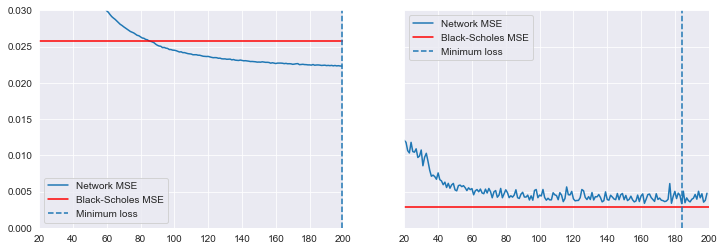

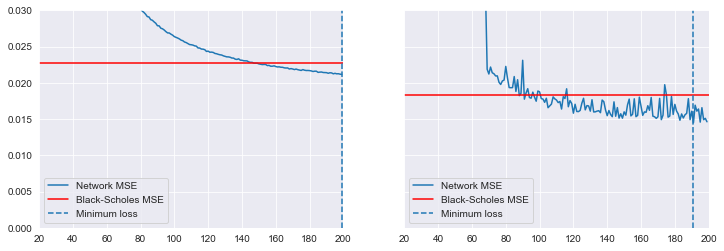

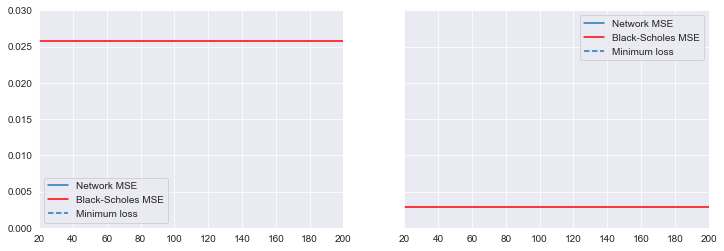

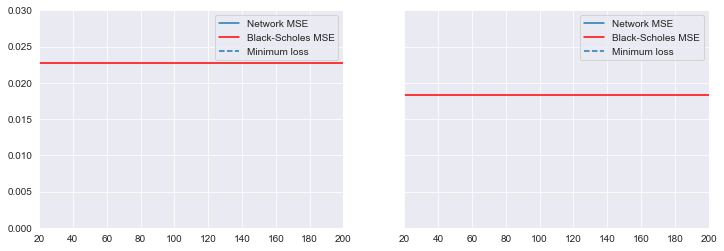

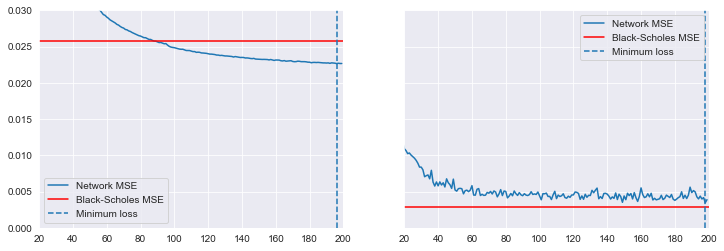

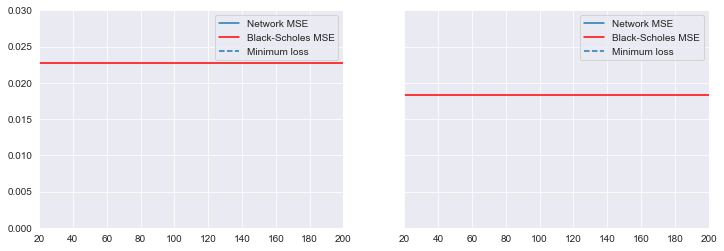

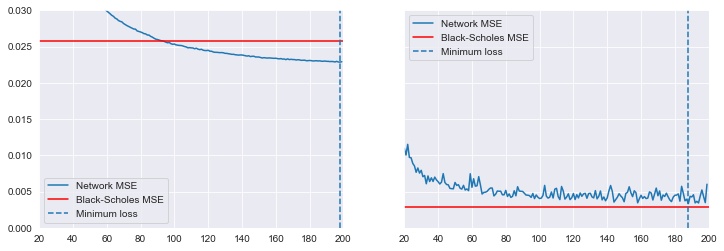

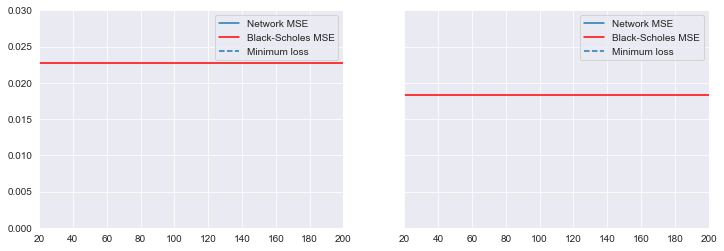

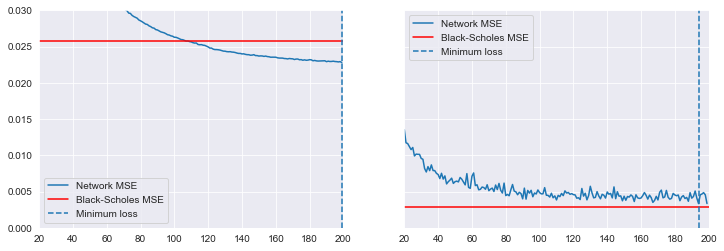

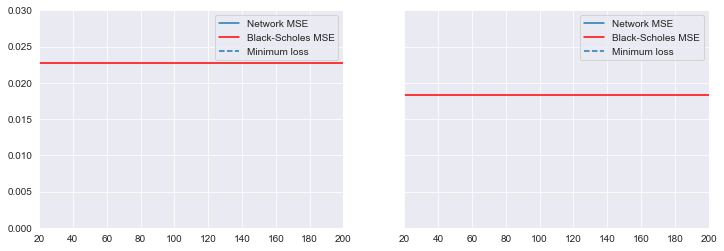

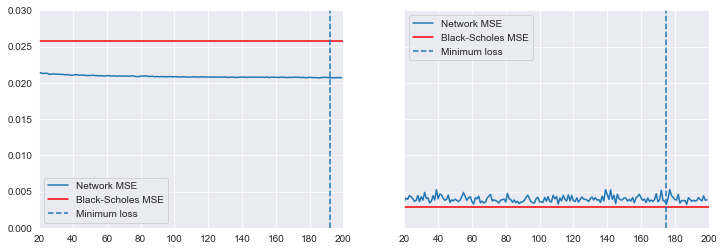

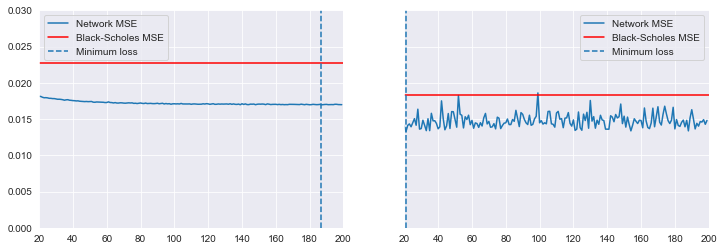

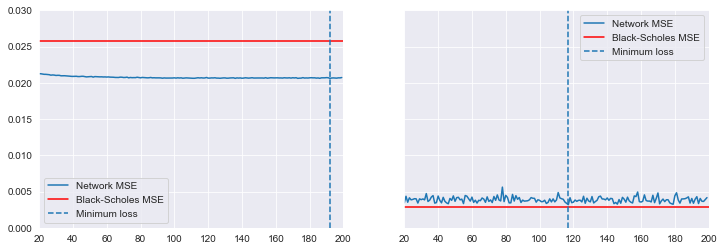

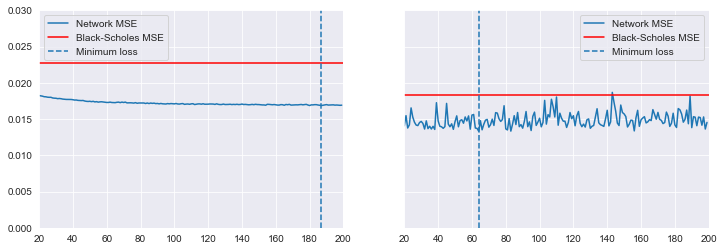

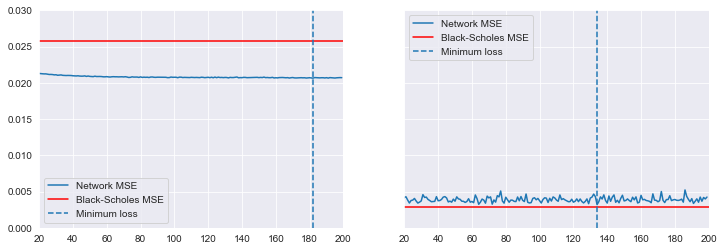

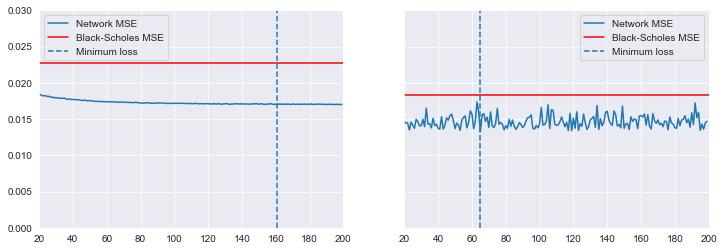

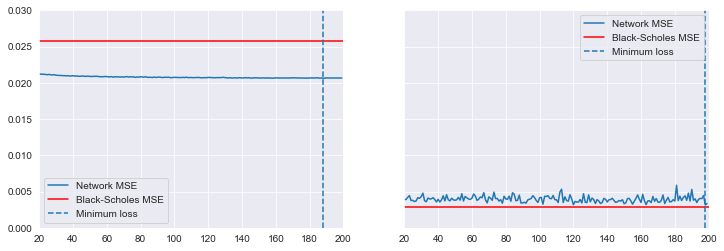

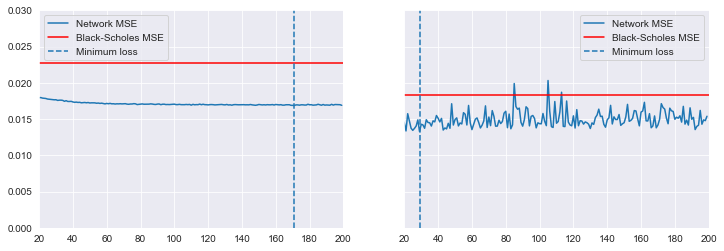

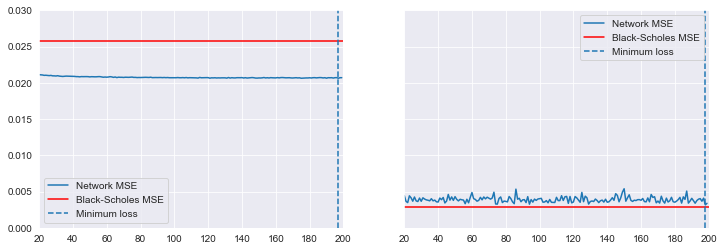

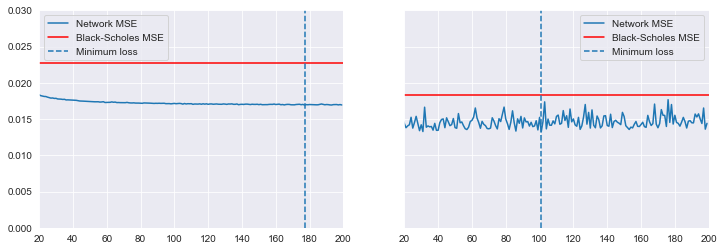

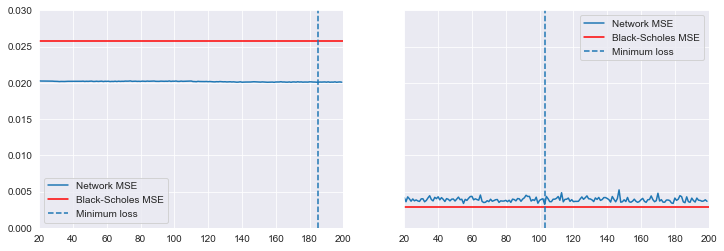

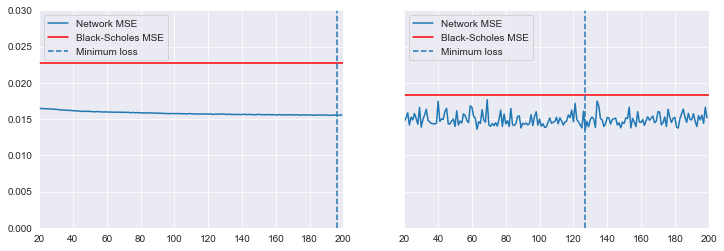

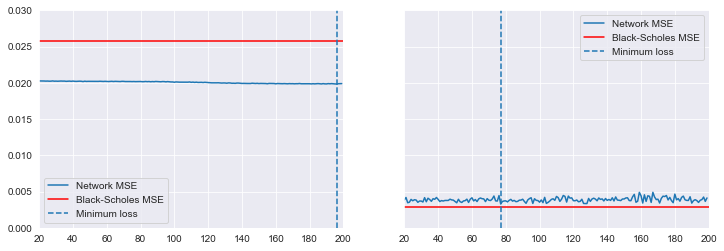

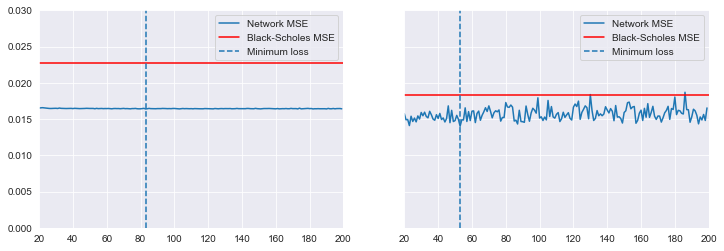

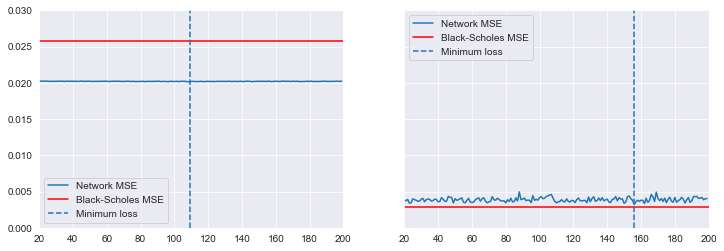

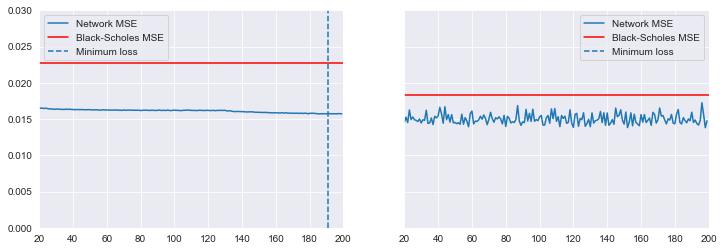

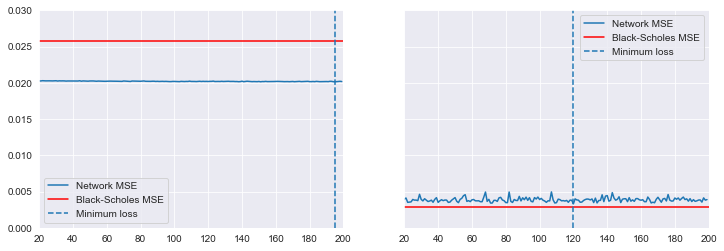

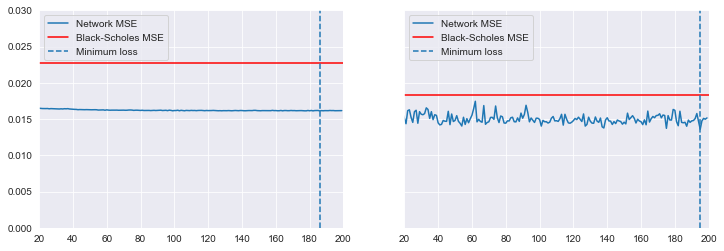

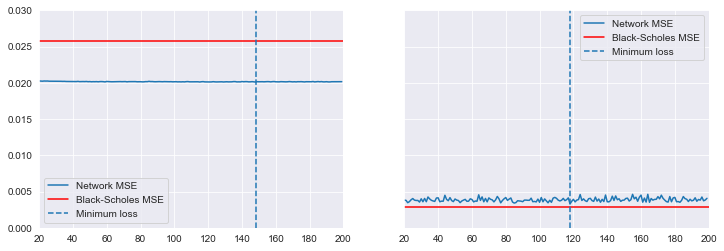

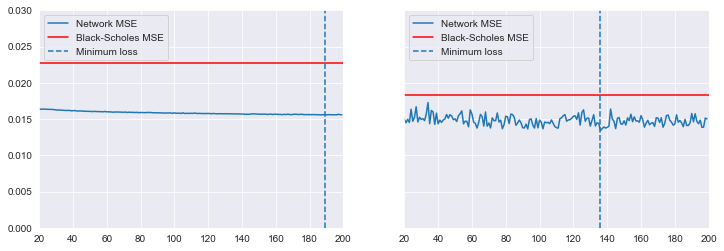

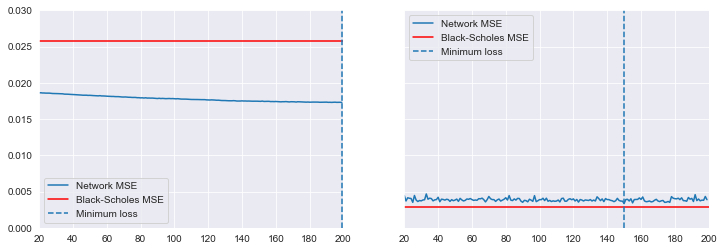

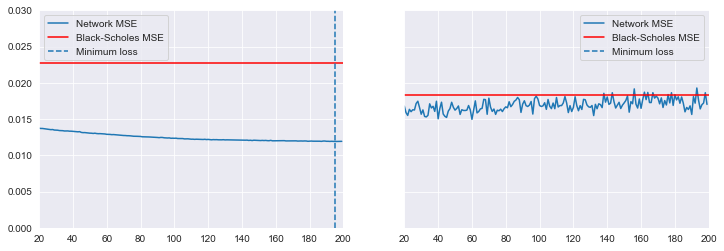

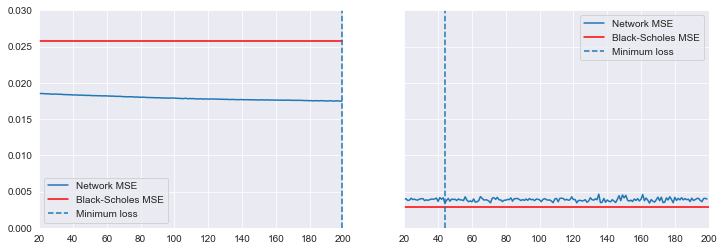

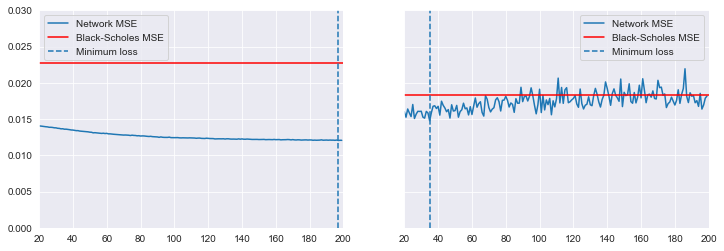

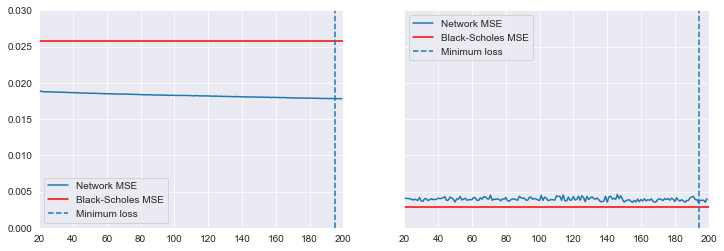

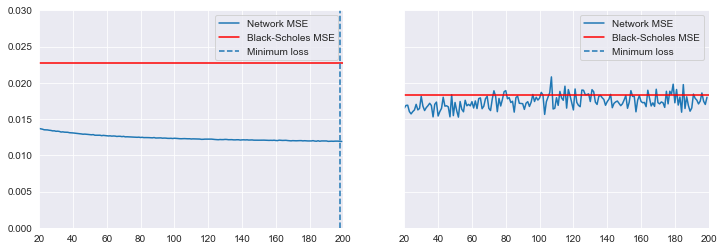

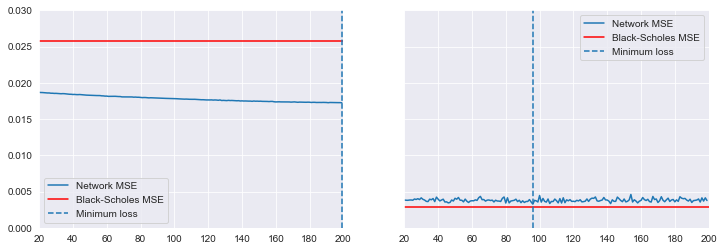

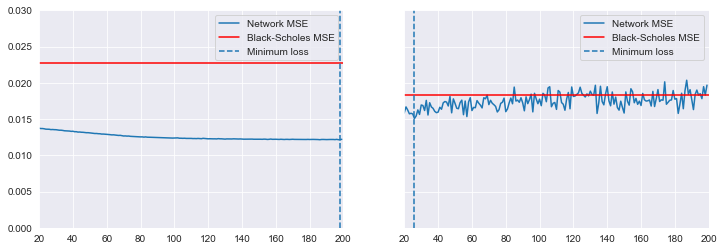

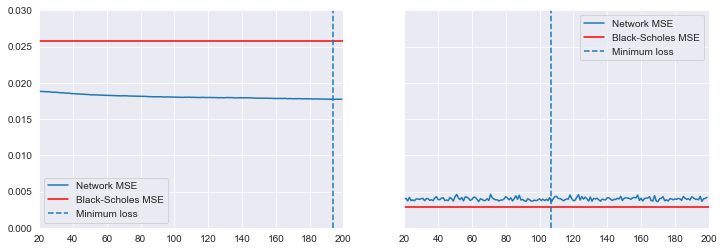

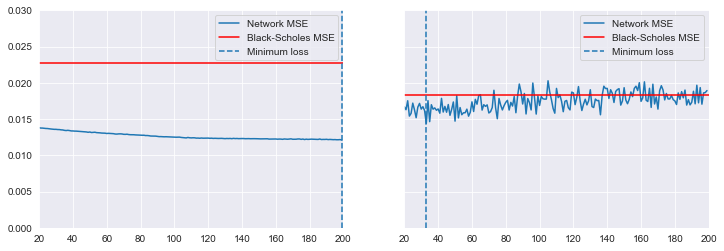

In [9]:
for value in value_set:
    # For instance, we tune regularization alpha
    hypers[lab_tune] = value
    alpha_dir = sub_res + f'para={value:.0e}/'
    
    for k in range(num_run):
        print('This is value={} in repeat {}'.format(value, k))
        alpha_dir_dict = {
            'ckp': alpha_dir + f'run{k}/ckp/',
            'history': alpha_dir + f'/run{k}/history/',
            'plot': alpha_dir + f'/run{k}/plot/'
        }
        for key, value1 in alpha_dir_dict.items():
            os.makedirs(value1, exist_ok=True)
        
        df_return = nw.rolling_net(
            df.copy(),
            ori_fea=ori_fea,
            use_fea=use_fea,
            end_period=end_period,
            hypers=hypers,
            sub_res_dir=alpha_dir_dict,
            tune=True
        )
        

## Summarize tuning results
This section can be run independent of the above one, if the directory paths are given properly.

In [10]:
value_set = [1e-0, 1e-1, 1e-2, 1e-3]
num_run = NUM_REPEATS

In [11]:
df_summary = pd.DataFrame(
    index=range(num_run), 
    columns=[f'para={v:.0e}' for v in value_set])

In [12]:
for value in value_set:
    for run in range(num_run):
        for i in range(end_period + 1):
            tmp = []
            df_history = pd.read_csv(f'{sub_res}para={value:.0e}/run{run}/history/history{i}.csv', index_col=0)
            tmp.append(df_history['val_mean_squared_error'].min())
        
        df_summary.loc[run, f'para={value:.0e}'] = sum(tmp) / len(tmp)
df_summary = df_summary.astype('float32')

In [13]:
df_summary.describe()

,para=1e+00,para=1e-01,para=1e-02,para=1e-03
count,5.000000,5.000000,5.000000,5.000000
mean,0.117326,0.013294,0.013661,0.014807
std,0.058257,0.000021,0.000235,0.000249
min,0.014498,0.013275,0.013406,0.014409
25%,0.129069,0.013283,0.013522,0.014764
50%,0.139978,0.013283,0.013597,0.014887
75%,0.149402,0.013303,0.013769,0.014898
max,0.153683,0.013326,0.014008,0.015077


In [14]:
df_summary.describe().to_csv(f'{sub_res}summary_metrics.csv')

with open(f'{sub_res}tuning-setting.txt', 'w') as f:
    f.write(f'Date and time: {datetime.datetime.now()},\n')
    f.write(f'Hypers: {hypers},\n')
    f.write(f'{lab_tune} is being tuned.\n')
    f.write(f'Value set: {value_set},\n')
    f.write(f'End period: {end_period},\n')
    f.write(f'Number of repeats: {num_run}\n')
    f.write(f'{lab_tune} is being tuned!')